# About the Data:

* address : This feature contains the address of the cafe in Bangalore/
* name : This feature contains the name of the cafe/
* online_order : whether online ordering is available in the cafe or not/
* book_table : table book option available or not
* rate : contains the overall rating of the cafe out of 5
* votes : contains total number of upvotes for the cafe
* location : contains the neighborhood in which the cafe is located
* rest_type : cafe type
* dish_liked : dishes people liked in the cafe
* cuisines : food styles, separated by comma
* approx_cost(for two people) : contains the approximate cost of meal for two people
* reviews_list : list of tuples containing reviews for the cafe, each tuple consists of two values,   rating and review by the customer
* listed_in(type) : type of meal
* listed_in(city) : contains the neighborhood in which the cafe is located

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
import plotly.express as px
import missingno as msno
from datetime import timedelta

# 1. Data Overview

In [2]:
data=pd.read_csv("Bangalore_cafe_dataset.csv")

In [3]:
data.head()

address             name  \
0  1112, Next to KIMS Medical College, 17th Cross...  San Churro Cafe   
1  2469, 3rd Floor, 24th Cross, Opposite BDA Comp...           Onesta   
2  1, 30th Main Road, 3rd Stage, Banashankari, Ba...   Penthouse Cafe   
3  2470, 21 Main Road, 25th Cross, Banashankari, ...        Smacznego   
4  941, 3rd FLOOR, 21st Main, 22nd Cross, Banasha...     Cafe Shuffle   

  online_order book_table   rate  votes      location            rest_type  \
0          Yes         No  3.8/5    918  Banashankari  Cafe, Casual Dining   
1          Yes        Yes  4.6/5   2556  Banashankari  Casual Dining, Cafe   
2          Yes         No  4.0/5    324  Banashankari                 Cafe   
3          Yes         No  4.2/5    504  Banashankari                 Cafe   
4          Yes        Yes  4.2/5    150  Banashankari                 Cafe   

                                          dish_liked  \
0  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
1  Farmhouse Pizza, Chocolate Banana, Virgin Moji...   
2  Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...   
3  Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...   
4  Mocktails, Peri Fries, Lasagne, Pizza, Chicken...   

                                   cuisines approx_cost(for two people)  \
0                    Cafe, Mexican, Italian                         800   
1                      Pizza, Cafe, Italian                         600   
2                Cafe, Italian, Continental                         700   
3  Cafe, Mexican, Italian, Momos, Beverages                         550   
4                Cafe, Italian, Continental                         600   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1           Cafes    Banashankari  
2             NaN             NaN  
3           Cafes    Banashankari  
4           Cafes    Banashankari

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4947 entries, 0 to 4946
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      4947 non-null   object
 1   name                         4947 non-null   object
 2   online_order                 4947 non-null   object
 3   book_table                   4947 non-null   object
 4   rate                         4687 non-null   object
 5   votes                        4947 non-null   int64 
 6   location                     4947 non-null   object
 7   rest_type                    4947 non-null   object
 8   dish_liked                   3418 non-null   object
 9   cuisines                     4947 non-null   object
 10  approx_cost(for two people)  4894 non-null   object
 11  listed_in(type)              4059 non-null   object
 12  listed_in(city)              4059 non-null   object
dtypes: int64(1), object(12)
memory us

In [5]:
data.sample(10)

address  \
353   Ground Floor, Sri Renuka Complex, Opposite Fir...   
4549  51, 19th Cross, 8th Main Road, Malleshwaram, B...   
4880  Sarjapura - Marathahalli Outer Ring Road, Kadu...   
2419  4th Floor, 7M-414, 7th Main Road, HRBR, 1st Bl...   
375   Pritech Park Food Court, RMZ Ecospace, Belland...   
1665  Conrad Bengaluru, Kensington Road, Ulsoor, Ban...   
3930  706, 3rd Floor, W.C.R, 2nd Stage, 9th Cross, B...   
78    Amoolya, 1st Floor, 24th Main, 6th Phase, JP N...   
578   9/3, Prestige Pearl House, Museum Road, Church...   
2584  66, First Floor, JNC Road, Koramangala 5th Blo...   

                                               name online_order book_table  \
353                                          Zoey's          Yes         No   
4549                              HighTeaParty Cafe          Yes         No   
4880  Re:fuel- Aloft Bengaluru Cessna Business Park           No         No   
2419                                         Onesta          Yes        Yes   
375                                   Tea Totallers          Yes         No   
1665              The Lobby Brew - Conrad Bengaluru           No        Yes   
3930                                         Onesta          Yes        Yes   
78                                   Crave Bit Cafe           No         No   
578                               Little Green Cafe           No         No   
2584                                         Dhuaan           No         No   

        rate  votes               location            rest_type  \
353    4.3/5    894          Sarjapur Road                 Cafe   
4549  3.9 /5     72           Malleshwaram                 Cafe   
4880     NaN      0              Bellandur         Cafe, Bakery   
2419   4.4/5   2589           Kammanahalli  Casual Dining, Cafe   
375    2.9/5     19              Bellandur                 Cafe   
1665   3.8/5     24                 Ulsoor                 Cafe   
3930  4.3 /5    355     Basaveshwara Nagar  Casual Dining, Cafe   
78       NEW      0               JP Nagar                 Cafe   
578    4.3/5    788          Church Street  Cafe, Casual Dining   
2584   4.2/5    130  Koramangala 5th Block                 Cafe   

                                             dish_liked  \
353   Waffles, Sandwiches, Burgers, Pasta Primavera,...   
4549  Cheese Balls, Mushroom Pasta, Paneer Pizza, Ch...   
4880                                                NaN   
2419  Roast Chicken Pizza, Ricotta Ravioli, Pasta, B...   
375                                                 NaN   
1665                                                NaN   
3930  Paneer Pizza, Penne Pasta, Cheesecake, Chocola...   
78                                                  NaN   
578   Spaghetti, Mezze Platter, Bombay Sandwich, Tom...   
2584  Paneer Pizza, Onion Rings, Oreo Shake, Peri Pe...   

                                               cuisines  \
353                  Cafe, Italian, Continental, Burger   
4549                  Cafe, Continental, Steak, Italian   
4880  Bakery, Beverages, Cafe, Coffee, Desserts, San...   
2419                               Pizza, Cafe, Italian   
375                              Cafe, Continental, Tea   
1665                      Cafe, North Indian, Fast Food   
3930                               Pizza, Cafe, Italian   
78                                                 Cafe   
578   Cafe, Healthy Food, Salad, Continental, Bevera...   
2584                                  Cafe, Continental   

     approx_cost(for two people) listed_in(type)        listed_in(city)  
353                          600           Cafes              Bellandur  
4549                         500        Delivery            Rajajinagar  
4880                       1,000           Cafes             Whitefield  
2419                         600        Delivery           Kammanahalli  
375                          500        Delivery              Bellandur  
1665                       2,200           Caf

# 2. Data Cleaning

In [6]:
#Replacing cafe with thier ratings given as New to NAN
data ['rate'] = data['rate'].replace('NEW',np.NaN)
data['rate'] = data['rate'].replace('-',np.NaN)

In [7]:
data.dtypes

address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [8]:
data['rate'].dtypes

dtype('O')

In [9]:
data.loc[:,'rate']

0        3.8/5
1        4.6/5
2        4.0/5
3        4.2/5
4        4.2/5
         ...  
4942    3.9 /5
4943    3.6 /5
4944    3.7 /5
4945    3.6 /5
4946       NaN
Name: rate, Length: 4947, dtype: object

In [10]:
data['rate'] = data.loc[:,'rate'].replace('[ ]','',regex = True)
data['rate'] = data['rate'].astype(str)
data['rate'] = data['rate'].apply(lambda r: r.replace('/5',''))
data['rate'] = data['rate'].apply(lambda r: float(r))

In [11]:
data.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                            424
votes                             0
location                          0
rest_type                         0
dish_liked                     1529
cuisines                          0
approx_cost(for two people)      53
listed_in(type)                 888
listed_in(city)                 888
dtype: int64

<AxesSubplot:>

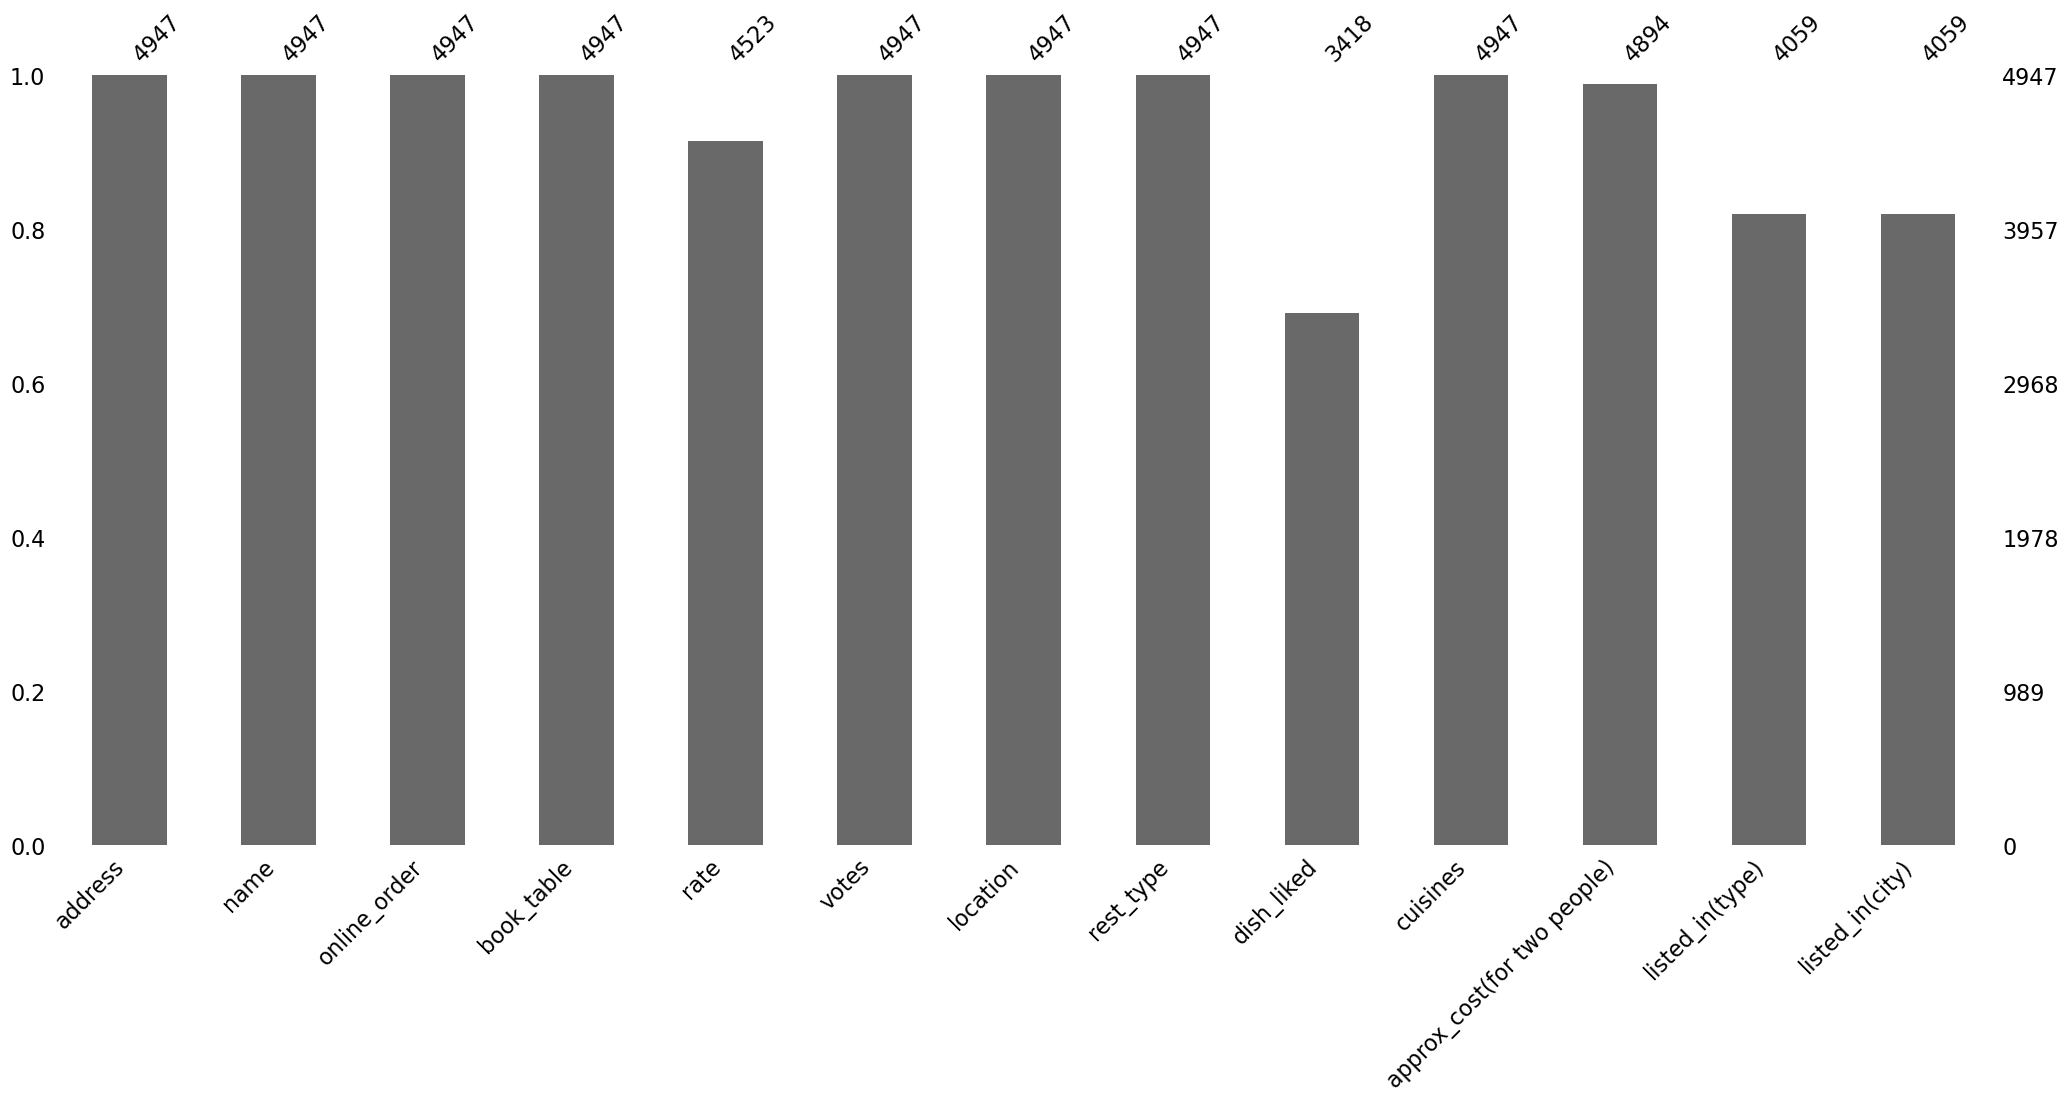

In [12]:
#Using msno graph
msno.bar(data)

# 3. Analysis of cafe based on thier Onlne Delivery

In [13]:
print('No of cafe with online delivery:')
(data.online_order == 'Yes').sum()

No of cafe with online delivery:


3033

In [14]:
print('No. of cafe which does not deliver onlie:')
(data.online_order == 'No').sum()

No. of cafe which does not deliver onlie:


1914

In [15]:
data.name.count()

4947

Text(0.5, 1.0, 'cafe delivering online or Not')

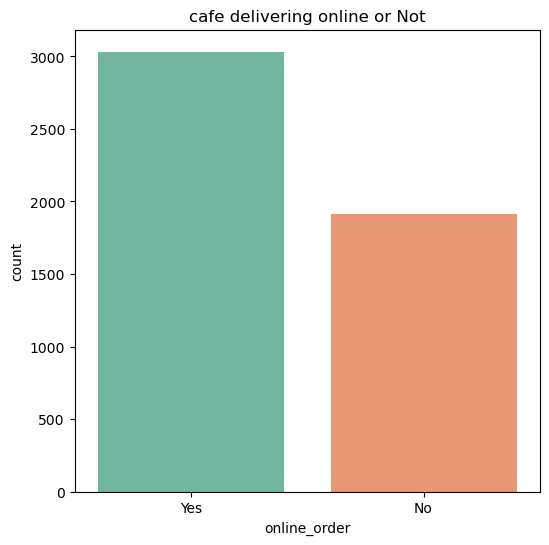

In [16]:
sns.countplot(x=data['online_order'],palette='Set2')
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('cafe delivering online or Not')

Text(0.5, 1.0, 'Type of cafe delivering online or Not')

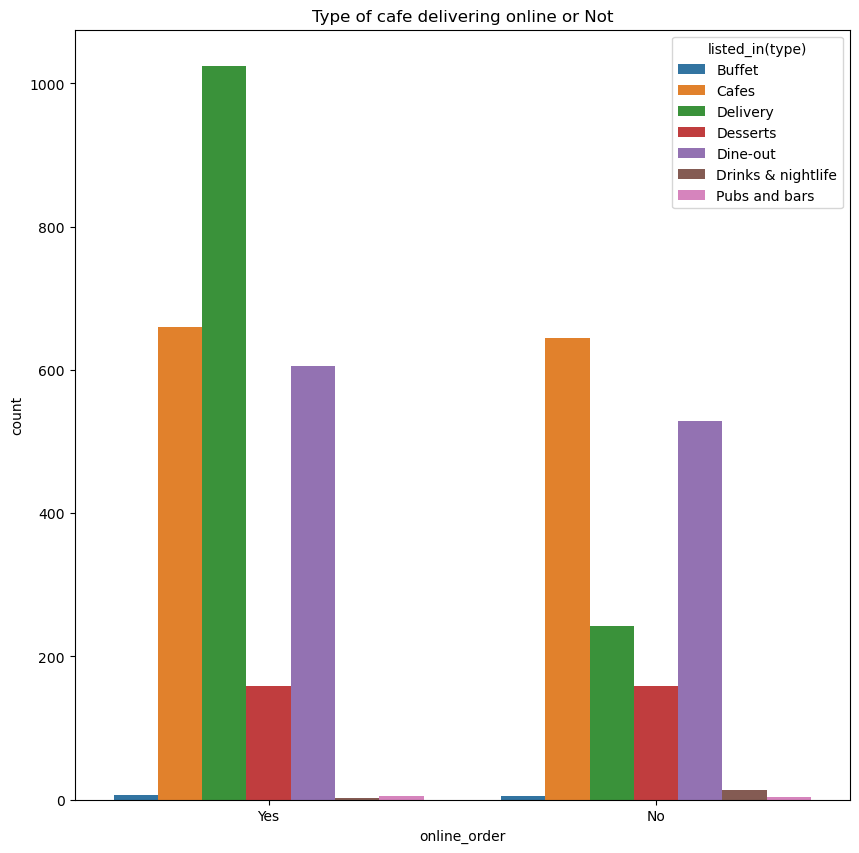

In [17]:
sns.countplot(x=data['online_order'], hue = data['listed_in(type)'])
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title('Type of cafe delivering online or Not')

<AxesSubplot:ylabel='online_order'>

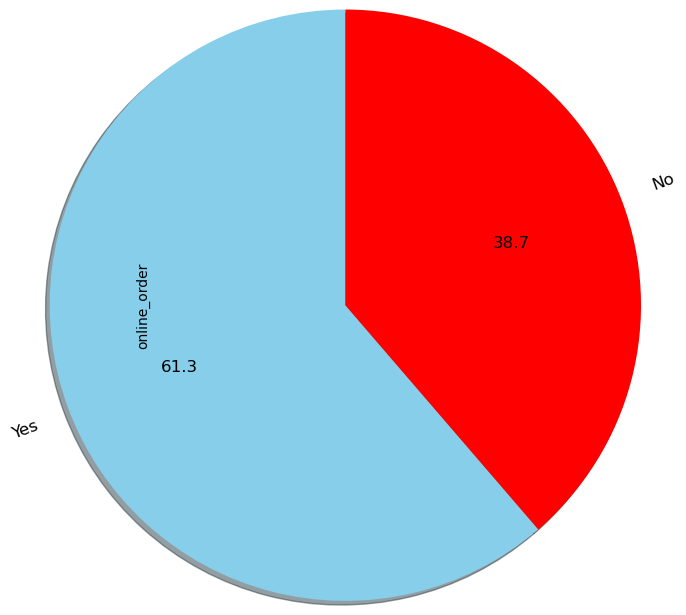

In [18]:
#is online delivery available? in percentage
colors = ('skyblue', 'red')
explodes = [0.5, 0.5]

data['online_order'].value_counts(sort=False).plot.pie(colors=colors,
                                                 textprops={'fontsize': 12}, 
                                                 autopct = '%4.1f',
                                                 startangle= 90, 
                                                 radius =2, 
                                                 rotatelabels=True,
                                                 shadow = True)

## Analysis of cafe based on their Table booking facility

In [19]:
print ("No. of cafe with table boking facility:")
(data.book_table == 'Yes').sum()

No. of cafe with table boking facility:


943

In [20]:
print("No. of cafe with table booking facility:")
(data.book_table == 'No').sum()

No. of cafe with table booking facility:


4004

Text(0.5, 1.0, 'cafe providing Table booking facilty:')

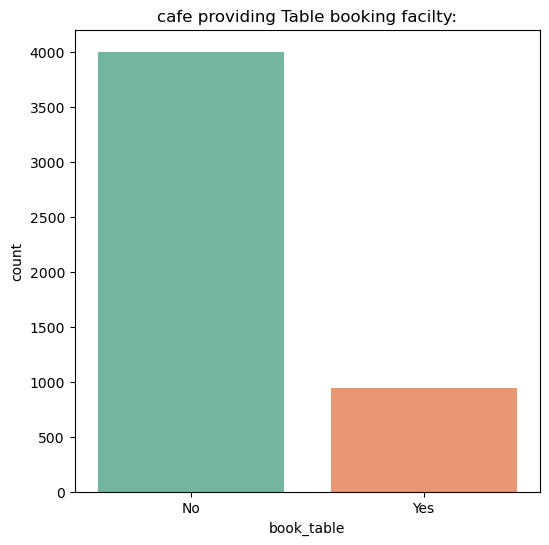

In [21]:
sns.countplot(x=data['book_table'], palette='Set2')
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('cafe providing Table booking facilty:')

Text(0.5, 1.0, 'Type Of cafe providing Table booking facility:')

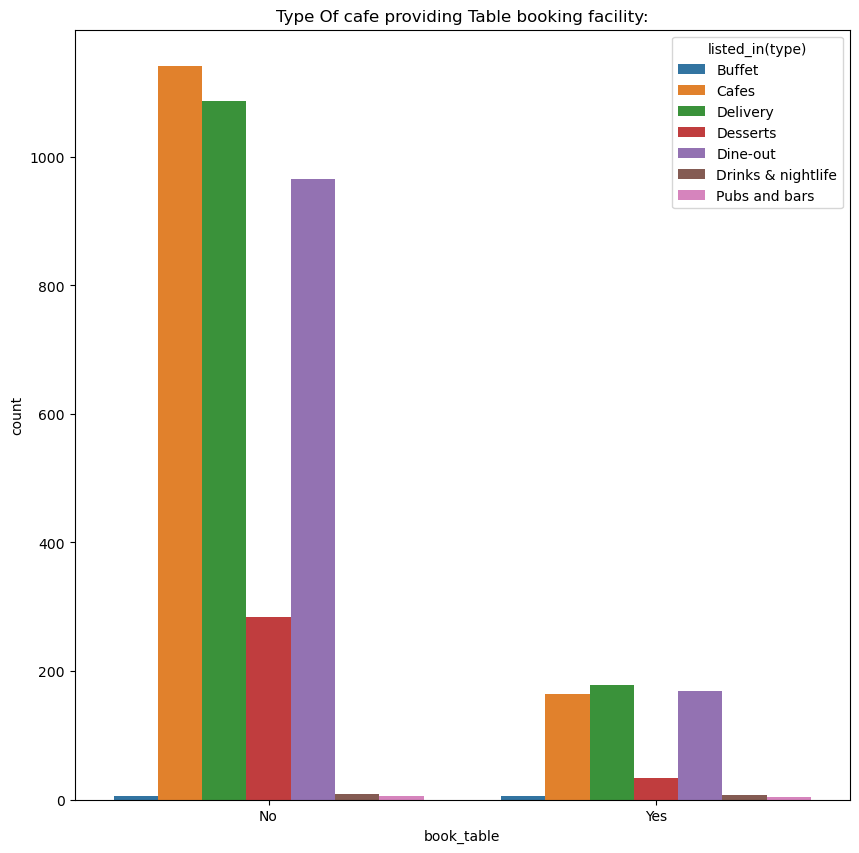

In [22]:
sns.countplot(x=data['book_table'],hue = data['listed_in(type)'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type Of cafe providing Table booking facility:')

<AxesSubplot:ylabel='book_table'>

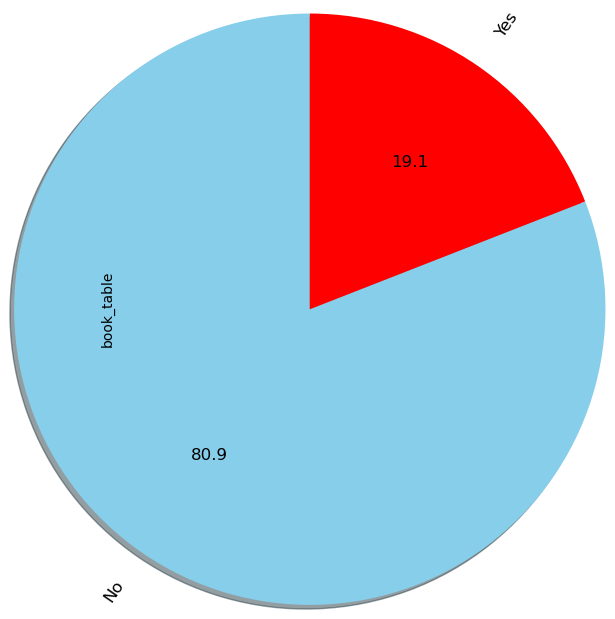

In [23]:
# Total percentage of book table available?
colors  = ("skyblue", "red")
explodes = [0.5, 0.5]

data["book_table"].value_counts(sort=False).plot.pie(colors=colors,
                                                 textprops={'fontsize': 12}, 
                                                 autopct = '%4.1f',
                                                 startangle= 90, 
                                                 radius =2, 
                                                 rotatelabels=True,
                                                 shadow = True) 

## Analysis of cafe based on thier Ratings

In [24]:
print("All unique cafe ratings:")
data.rate.unique()

All unique cafe ratings:


array([3.8, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.7, 3.6, 3.2, 3.3, 2.6, 4.1,
       3.4, nan, 2.7, 4.4, 2.9, 2.8, 4.3, 4.5, 4.7, 3.5, 2.3, 2.5, 2.4])

In [25]:
print("no. of cafe between 1.5 and 2 rating:")
((data.rate>=1.5) & (data.rate<2)).sum()

no. of cafe between 1.5 and 2 rating:


0

In [26]:
print("no. of cafe between 2.5 and 3 rating:")
((data.rate>=2.5) & (data.rate<3)).sum()

no. of cafe between 2.5 and 3 rating:


203

In [27]:
print("no. of cafe between 2 and 2.5 rating:")
((data.rate>=2) & (data.rate<2.5)).sum()

no. of cafe between 2 and 2.5 rating:


8

In [28]:
print("no. of cafe between 3.0 and 3.5 rating:")
((data.rate>=3.0) & (data.rate<3.5)).sum()

no. of cafe between 3.0 and 3.5 rating:


380

In [29]:
print("no. of cafe between 3.5 and 4 rating:")
((data.rate>=3.5) & (data.rate<4)).sum()

no. of cafe between 3.5 and 4 rating:


1522

In [30]:
print("no. of cafe between 4 and 4.5 rating:")
((data.rate>=4) & (data.rate<4.5)).sum()

no. of cafe between 4 and 4.5 rating:


2136

In [31]:
print("no. of cafe between 4.5 and 5 rating:")
((data.rate>=4.5) & (data.rate<5)).sum()

no. of cafe between 4.5 and 5 rating:


274

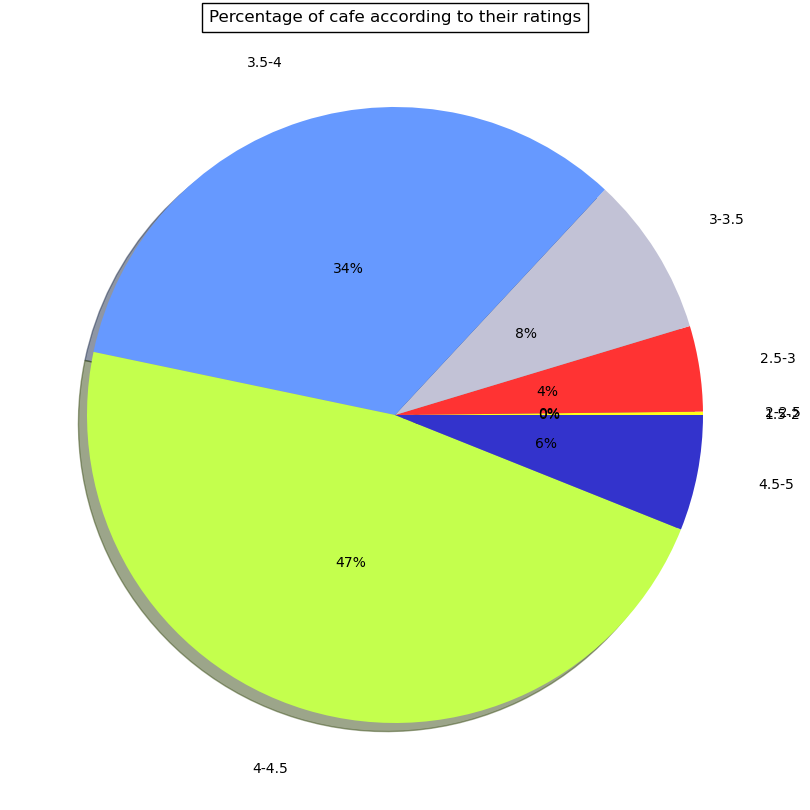

In [32]:
slices=[((data.rate>=1.5) & (data.rate<2)).sum(),
        ((data.rate>=2) & (data.rate<2.5)).sum(),
        ((data.rate>=2.5) & (data.rate<3)).sum(),
        ((data.rate>=3.0) & (data.rate<3.5)).sum(),
        ((data.rate>=3.5) & (data.rate<4)).sum(),
        ((data.rate>=4) & (data.rate<4.5)).sum(),
        ((data.rate>=4.5) & (data.rate<5)).sum()
          ]
labels=['1.5-2','2-2.5','2.5-3','3-3.5','3.5-4','4-4.5','4.5-5']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of cafe according to their ratings", bbox={'facecolor':'1', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

### Analysis of cafe based on their table booking facility and how rating is related to it

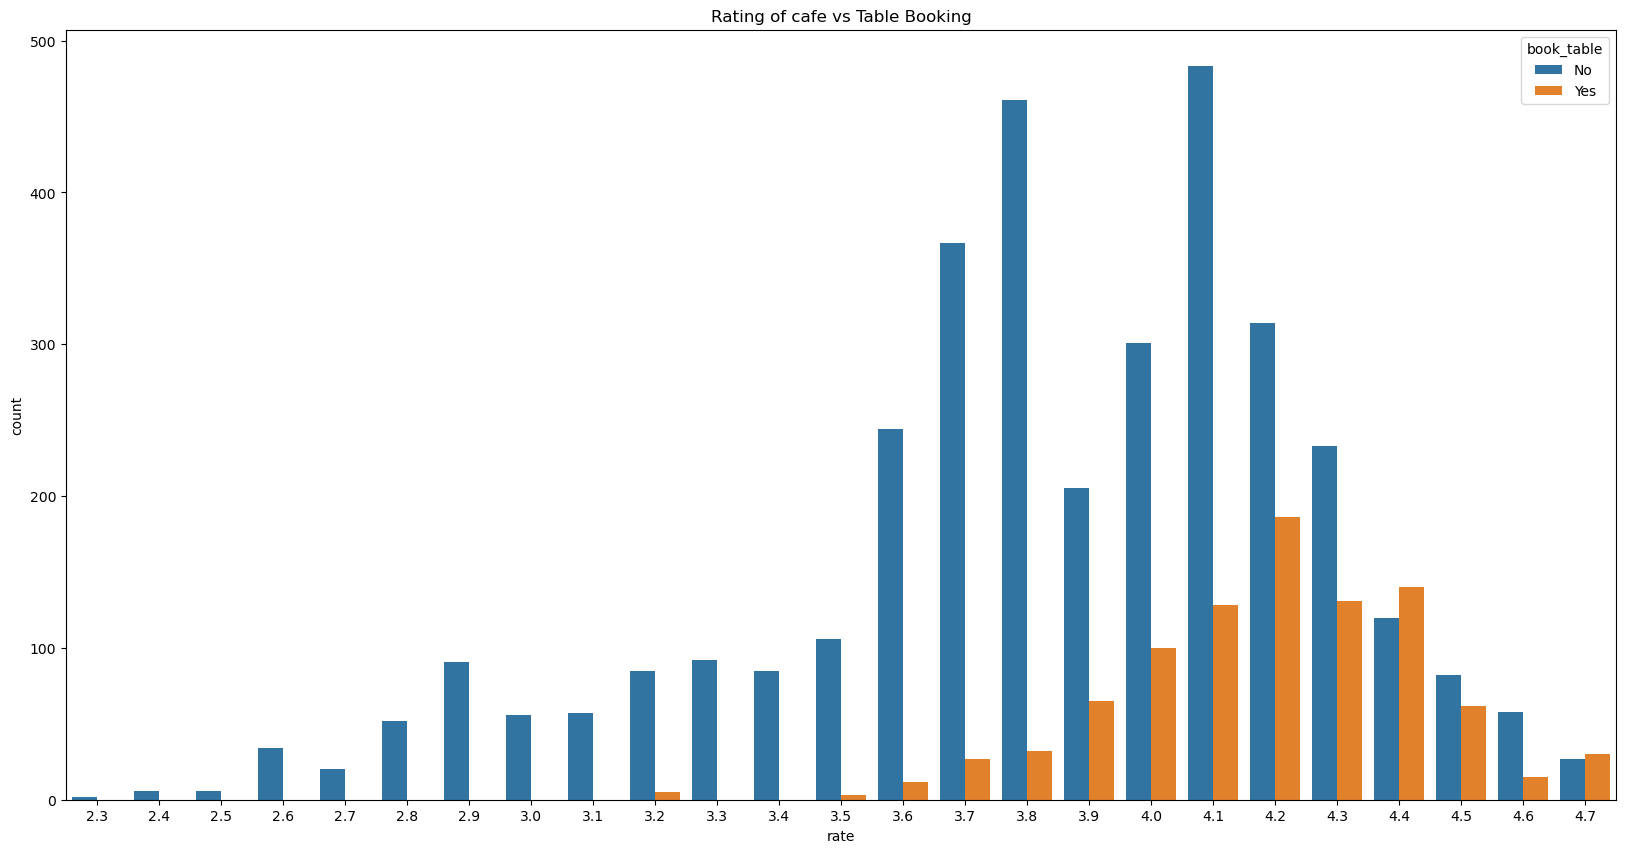

In [33]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='rate',hue='book_table',data=data)
plt.title('Rating of cafe vs Table Booking')
plt.show()

## Analysis of cafe based on their online order and how rating is related to it

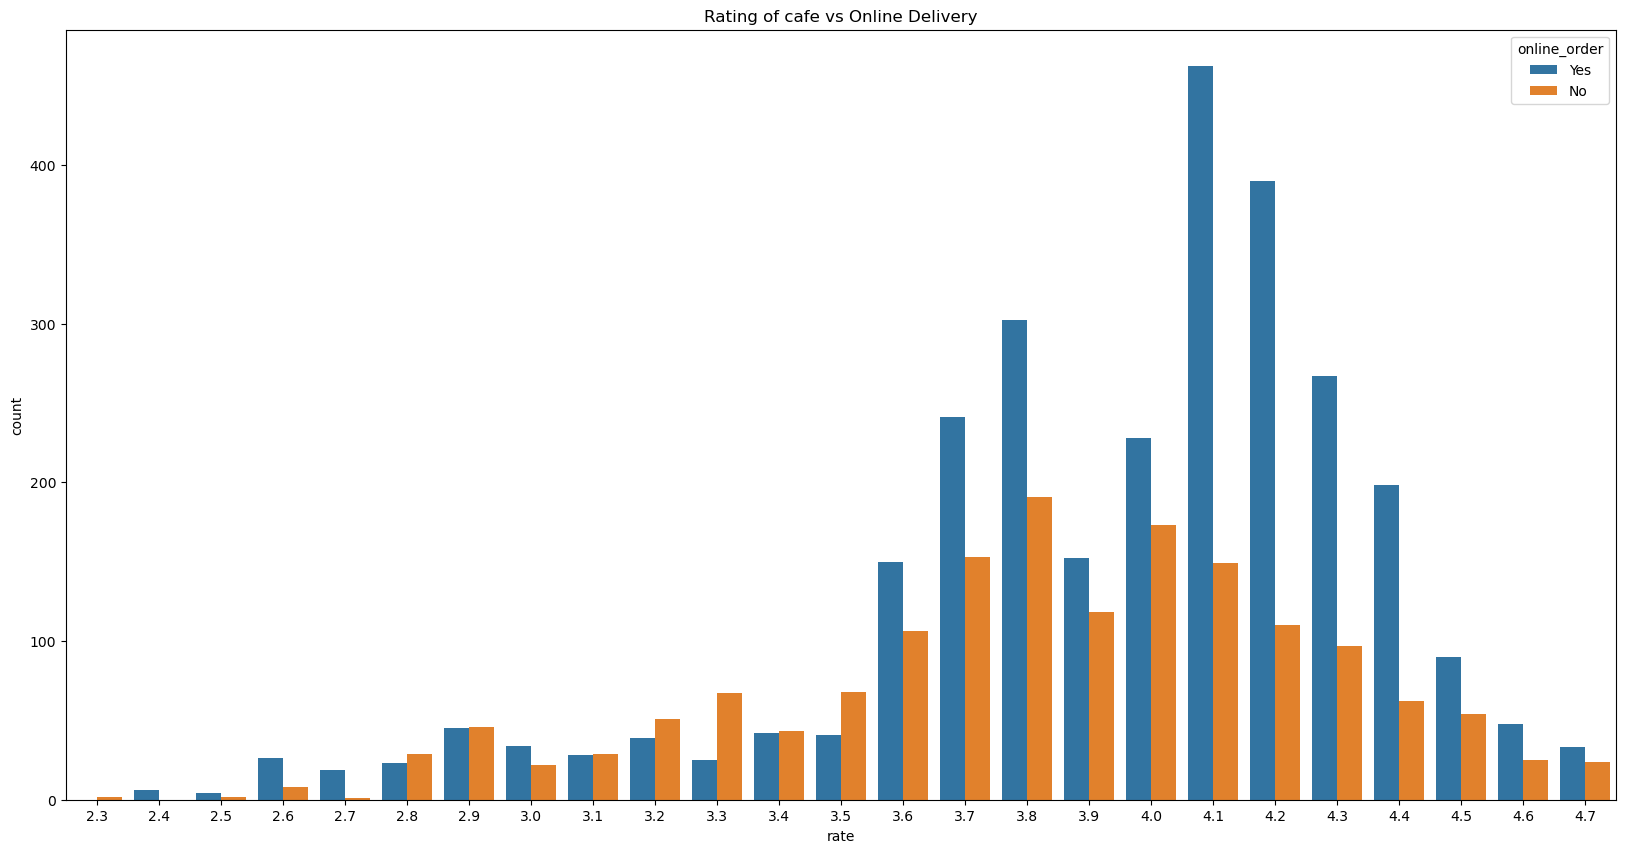

In [34]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='rate',hue='online_order',data=data)
plt.title('Rating of cafe vs Online Delivery')
plt.show()

It is evident that, in contrast to online delivery, table reservations have little impact on a cafe's ratings. Due to the variety of deals available, people frequently opt to place their orders online. Online delivery is therefore more crucial for cafes in Bangalore to succeed.

## Analysis of cafe based on their location 

In [35]:
print("All unique locations of cafe in Bangalore")
data.location.unique()

All unique locations of cafe in Bangalore


array(['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout',
       'JP Nagar', 'Bannerghatta Road', 'BTM', 'Shanti Nagar',
       'Richmond Road', 'Wilson Garden', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'HSR', 'Church Street', 'MG Road', 'Brigade Road',
       'Residency Road', 'St. Marks Road', 'Lavelle Road', 'Ulsoor',
       'Infantry Road', 'Commercial Street', 'Shivajinagar',
       'Cunningham Road', 'Vasanth Nagar', 'City Market',
       'Race Course Road', 'Indiranagar', 'Frazer Town',
       'Koramangala 7th Block', 'Koramangala 8th Block', 'Brookefield',
       'Whitefield', 'ITPL Main Road, Whitefield',
       'Koramangala 2nd Block', 'Koramangala 5th Block',
       'Koramangala 4th Block', 'Koramangala 3rd Block',
       'Koramangala 1st Block', 'Koramangala 6th Block',
       'Electronic City', 'Banaswadi', 'Kammanahalli', 'Bommanahalli',
       'Domlur', 'Jeevan Bhima Nagar', 'Thippasandra', 'Old Airport Road',
       'CV Raman Nagar', 'Old Mad

In [36]:
print("Count of cafe at unique locations")
locationCount=data['location'].value_counts().sort_values(ascending=True)
locationCount

Count of cafe at unique locations


Nagawara                   1
Old Madras Road            2
Vijay Nagar                2
Sahakara Nagar             2
Kaggadasapura              2
                        ... 
JP Nagar                 204
Jayanagar                234
BTM                      320
Indiranagar              321
Koramangala 5th Block    468
Name: location, Length: 66, dtype: int64

In [37]:
#lets check max count
print("Maximum number of cafe Present at:")
count_max=max(locationCount)
for x,y in locationCount.items():
    if(y==count_max):
        print(x)

Maximum number of cafe Present at:
Koramangala 5th Block


In [38]:
#lets check min count
print("minimum number of cafe present at:")
min_count=min(locationCount)
for x,y in locationCount.items():
    if(y==min_count):
        print(x)

minimum number of cafe present at:
Nagawara


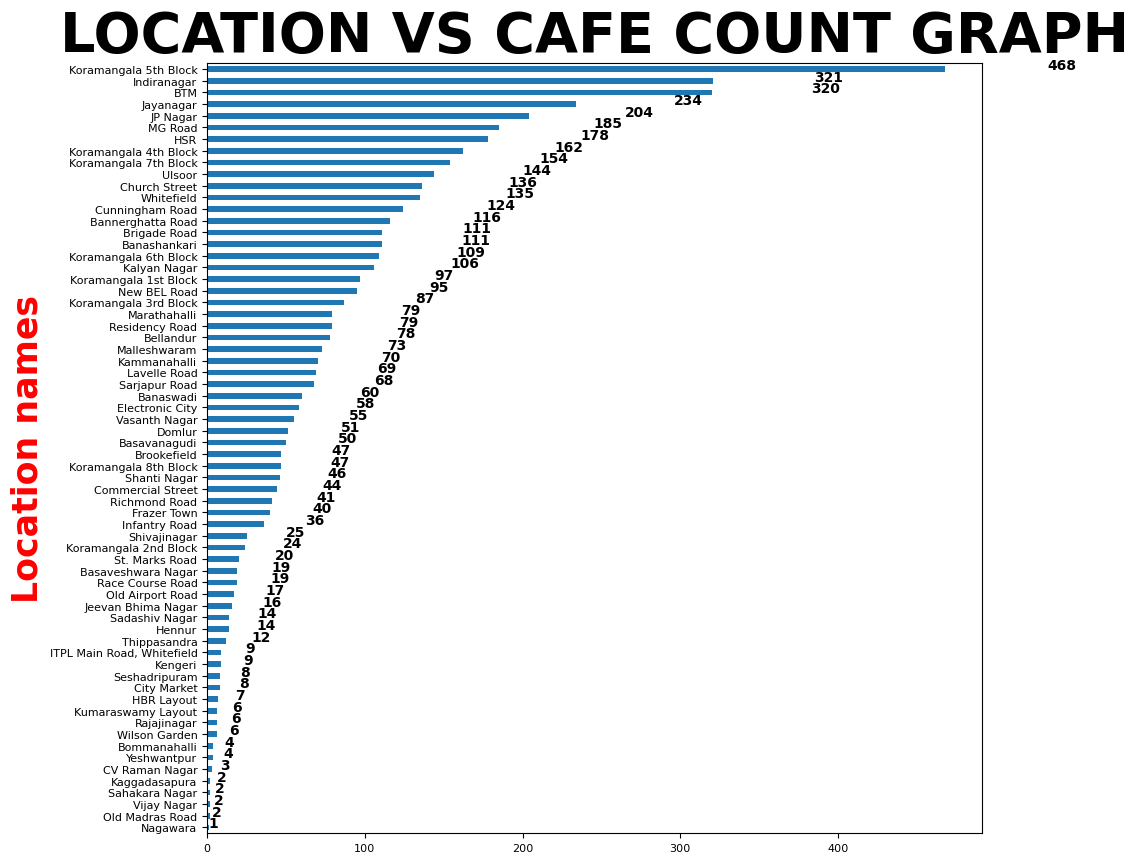

In [39]:
fig=plt.figure(figsize=(10,10))
locationCount.plot(kind="barh",fontsize=8)
plt.ylabel("Location names",fontsize=25,color="red",fontweight='bold')
plt.title("LOCATION VS CAFE COUNT GRAPH",fontsize=40,color="BLACK",fontweight='bold')
for v in range(len(locationCount)):
    #plt.text(x axis location ,y axis location ,text value ,other parameters......)
    plt.text(v+locationCount[v],v,locationCount[v],fontsize=10,color="BLACK",fontweight='bold')

## Analysis of cafe based on their Dining Type¶

In [40]:
print("All different dining type cafe")
data['listed_in(type)'].unique()

All different dining type cafe


array(['Buffet', 'Cafes', nan, 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [41]:
print("Count of All different dining type cafe")
cafeTypeCount=data['listed_in(type)'].value_counts().sort_values(ascending=True)
cafeTypeCount

Count of All different dining type cafe


Pubs and bars            9
Buffet                  12
Drinks & nightlife      15
Desserts               318
Dine-out              1134
Delivery              1266
Cafes                 1305
Name: listed_in(type), dtype: int64

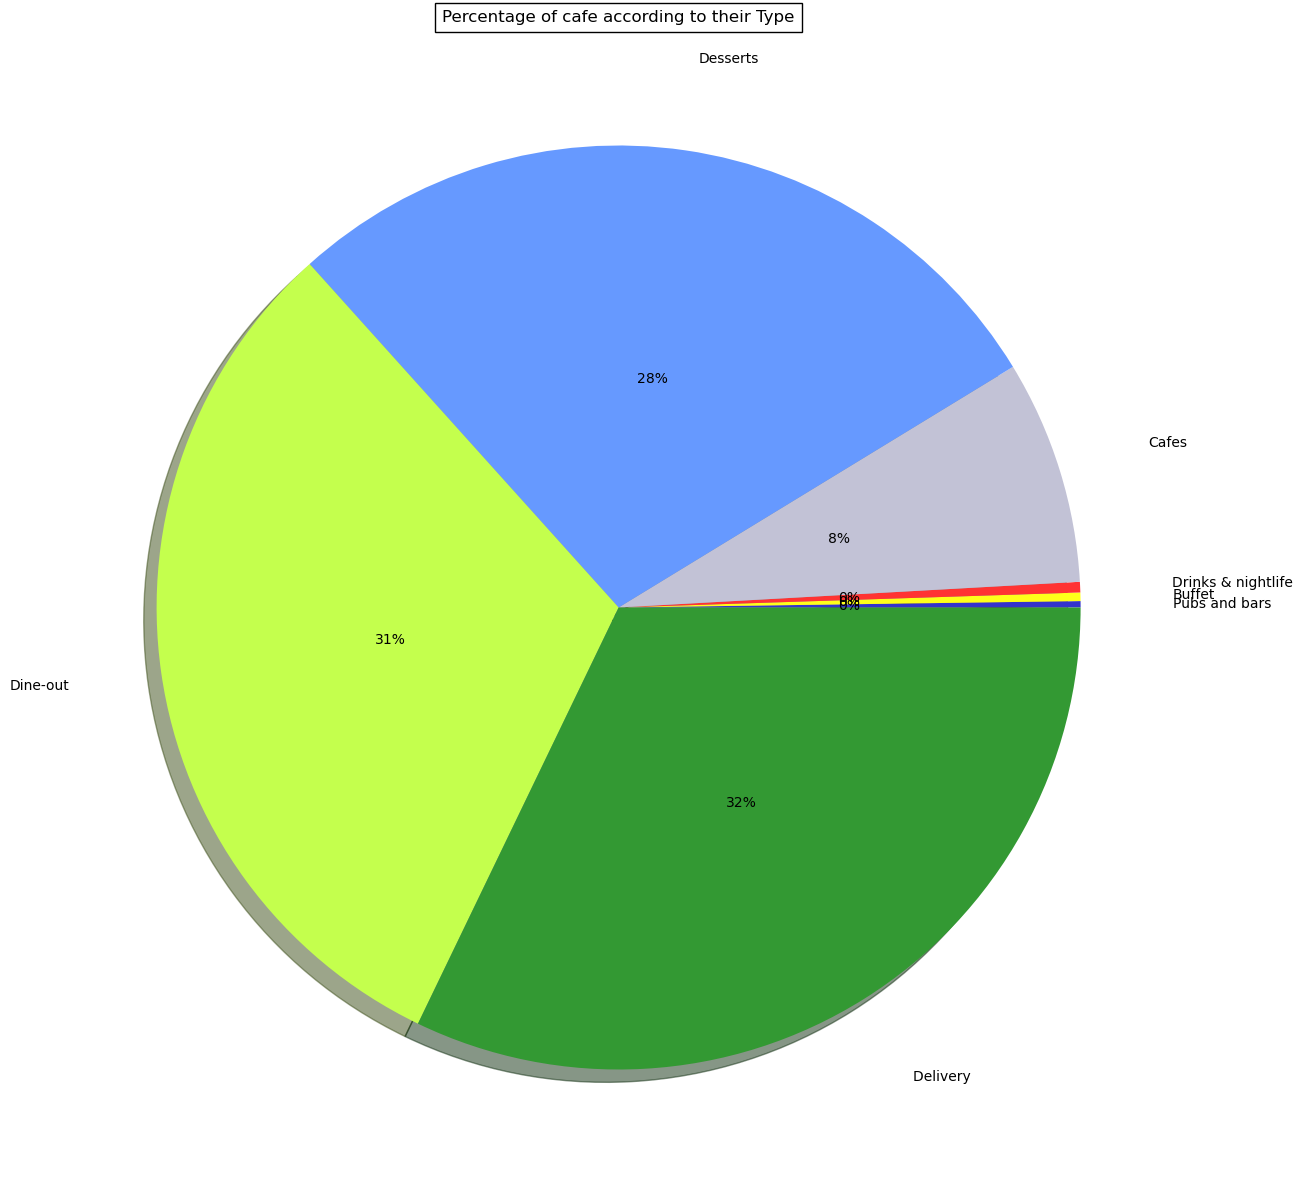

In [42]:
slices=[cafeTypeCount[0],
        cafeTypeCount[1],
        cafeTypeCount[2],
        cafeTypeCount[3],
        cafeTypeCount[4],
        cafeTypeCount[5],
        cafeTypeCount[6]]
labels=['Pubs and bars','Buffet','Drinks & nightlife','Cafes','Desserts','Dine-out','Delivery ']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d','#339933']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of cafe according to their Type", bbox={'facecolor':'1', 'pad':5})

fig.set_size_inches(15,15)
plt.show()

## Analysis of cafe based on their Subcity Type


In [43]:
CityCount=data['listed_in(city)'].value_counts().sort_values(ascending=True)
CityCount

Electronic City           49
Rajajinagar               53
Marathahalli              61
Bellandur                 62
New BEL Road              64
Sarjapur Road             68
Banashankari              75
Brookefield               80
Whitefield                80
Malleshwaram              88
HSR                      109
Frazer Town              111
Bannerghatta Road        112
Old Airport Road         115
Kammanahalli             115
Kalyan Nagar             119
Basavanagudi             129
Residency Road           144
MG Road                  149
JP Nagar                 150
Lavelle Road             164
Brigade Road             174
Church Street            184
Koramangala 5th Block    194
Indiranagar              205
Jayanagar                212
Koramangala 6th Block    223
Koramangala 7th Block    244
Koramangala 4th Block    255
BTM                      271
Name: listed_in(city), dtype: int64

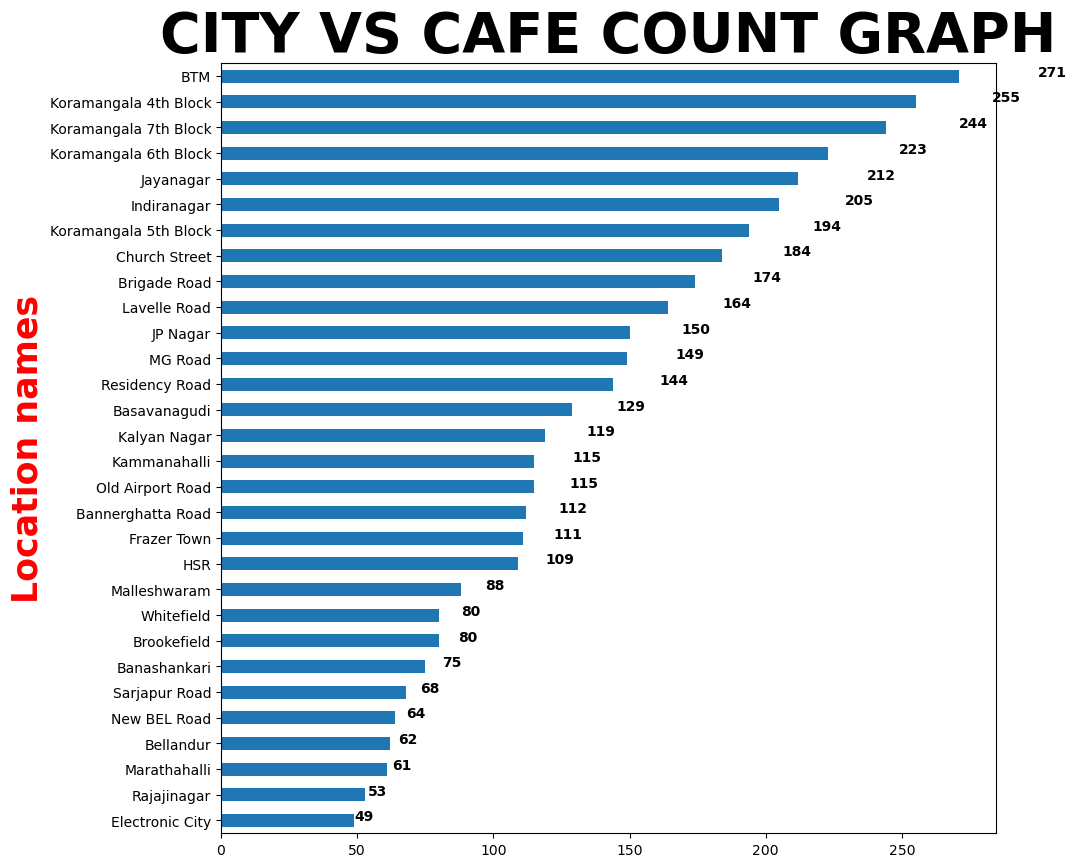

In [44]:
fig=plt.figure(figsize=(10,10))
CityCount.plot(kind="barh",fontsize=10)
plt.ylabel("Location names",fontsize=25,color="red",fontweight='bold')
plt.title("CITY VS CAFE COUNT GRAPH",fontsize=40,color="BLACK",fontweight='bold')
for v in range(len(CityCount)):
    #plt.text(x axis location ,y axis location ,text value ,other parameters......)
    plt.text(v+CityCount[v],v,CityCount[v],fontsize=10,color="BLACK",fontweight='bold')

Text(0.5, 1.0, 'COST FOR 2 PEOPLE VS CAFE  GRAPH')

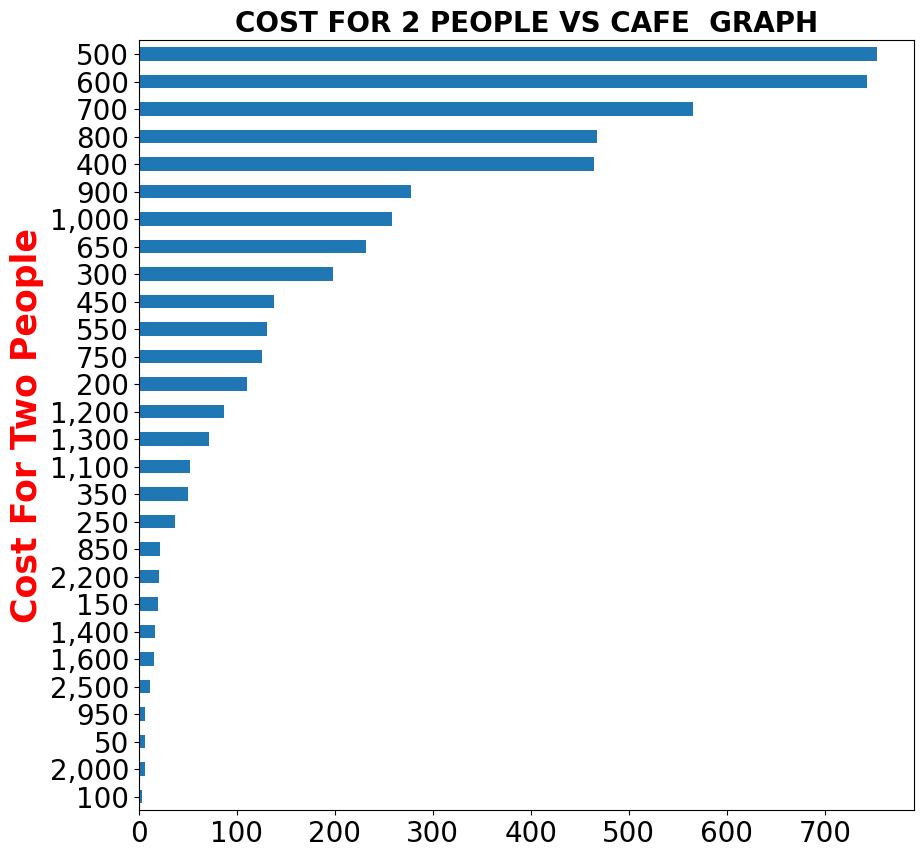

In [45]:
CostCount=data['approx_cost(for two people)'].value_counts().sort_values(ascending=True)
fig=plt.figure(figsize=(10,10))
CostCount.plot(kind="barh",fontsize=20)
plt.ylabel("Cost For Two People",fontsize=25,color="red",fontweight='bold')
plt.title("COST FOR 2 PEOPLE VS CAFE  GRAPH",fontsize=20,color="BLACK",fontweight='bold')

In [46]:
data.votes.describe()

count     4947.000000
mean       579.667475
std       1308.495949
min          0.000000
25%         30.000000
50%        124.000000
75%        523.000000
max      14726.000000
Name: votes, dtype: float64

In [47]:
data[((data.votes>=300)==True) & ((data.rate>=4)==True)].describe()


rate         votes
count  1609.000000   1609.000000
mean      4.257489   1577.883779
std       0.179953   1933.730565
min       4.000000    306.000000
25%       4.100000    506.000000
50%       4.200000    872.000000
75%       4.400000   1852.000000
max       4.700000  14726.000000

## Analysis of cafe based on their Coffee and FoodType

In [48]:
print("all different cuisines:")
cuisines = set()
for i in data['cuisines']:
    for j in str(i).split(', '):
        cuisines.add(j)
cuisines

all different cuisines:


{'American',
 'Andhra',
 'Arabian',
 'Asian',
 'BBQ',
 'Bakery',
 'Beverages',
 'Biryani',
 'Burger',
 'Cafe',
 'Chinese',
 'Coffee',
 'Continental',
 'Desserts',
 'European',
 'Fast Food',
 'Finger Food',
 'French',
 'German',
 'Goan',
 'Greek',
 'Healthy Food',
 'Ice Cream',
 'Italian',
 'Japanese',
 'Jewish',
 'Juices',
 'Kashmiri',
 'Lebanese',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Modern Indian',
 'Momos',
 'Mughlai',
 'North Eastern',
 'North Indian',
 'Parsi',
 'Pizza',
 'Rolls',
 'Salad',
 'Sandwich',
 'South American',
 'South Indian',
 'Spanish',
 'Steak',
 'Street Food',
 'Tea',
 'Tex-Mex',
 'Thai',
 'Turkish',
 'Vegan',
 'Wraps'}

In [49]:
import plotly.graph_objs as go
values = data['cuisines'].value_counts()[:20]
labels=values.index
text=values.index
fig = go.Figure(data=[go.Pie(values=values,labels=labels,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=3)))
fig.update_layout(title="Most popular cuisines of Bangalore ",
                  titlefont={'size': 30},
                  )
fig.show()

## Choosing All the North Indian Food Serving cafe

In [50]:
NorthIndianFoodcafe = data[data['cuisines'].str.contains('North Indian', case=False, regex=True,na=False)]
NorthIndianFoodcafe.head()

address              name  \
13  146, 50 ft Road, 3rd Phase, 3rd Stage, Near Ka...  The Vintage Cafe   
22  112, Bull Temple Road,next to more Basavanagud...  Srinathji's Cafe   
28  146, 50 ft Road, 3rd Phase, 3rd Stage, Near Ka...  The Vintage Cafe   
30  112, Bull Temple Road,next to more Basavanagud...  Srinathji's Cafe   
71  146, 50 ft Road, 3rd Phase, 3rd Stage, Near Ka...  The Vintage Cafe   

   online_order book_table  rate  votes      location            rest_type  \
13          Yes         No   3.0     62  Banashankari                 Cafe   
22           No         No   3.8    148  Basavanagudi  Casual Dining, Cafe   
28          Yes         No   3.0     62  Banashankari                 Cafe   
30           No         No   3.8    148  Basavanagudi  Casual Dining, Cafe   
71          Yes         No   3.0     62  Banashankari                 Cafe   

                                           dish_liked  \
13  Burgers, Caramel Milkshake, Iced Coffee, Iced Tea   
22  Paratha, Sandwich, Chilli Idli, Noodles, Sandw...   
28  Burgers, Caramel Milkshake, Iced Coffee, Iced Tea   
30  Paratha, Sandwich, Chilli Idli, Noodles, Sandw...   
71  Burgers, Caramel Milkshake, Iced Coffee, Iced Tea   

                                  cuisines approx_cost(for two people)  \
13              Cafe, French, North Indian                         400   
22  North Indian, Cafe, Chinese, Fast Food                         550   
28              Cafe, French, North Indian                         400   
30  North Indian, Cafe, Chinese, Fast Food                         550   
71              Cafe, French, North Indian                         400   

   listed_in(type) listed_in(city)  
13           Cafes    Banashankari  
22           Cafes    Banashankari  
28        Delivery    Banashankari  
30        Delivery    Banashankari  
71        Dine-out    Banashankari

## Choosing All the Chinese Food Serving cafe

In [51]:
ChineseFoodcafe = data[data['cuisines'].str.contains('Chinese|Momos', case=False, regex=True,na=False)]
ChineseFoodcafe.head()

address  \
3   2470, 21 Main Road, 25th Cross, Banashankari, ...   
5       6th Block, 3rd Stage, Banashankari, Bangalore   
9   241, 4th Floor, 100 Feet Ring Road, Opposite K...   
10  405, 24th Cross, 9th Main, 2nd Stage, Banashan...   
12  47, 48 &49, 3Rd Floor, 21st Main Road, 2nd Sta...   

                             name online_order book_table  rate  votes  \
3                       Smacznego          Yes         No   4.2    504   
5                The Coffee Shack          Yes        Yes   4.2    164   
9                    Catch-up-ino          Yes         No   3.9    133   
10               Kirthi's Biryani          Yes         No   3.8    144   
12  360 Atoms Restaurant And Cafe          Yes         No   3.1     13   

        location rest_type                                         dish_liked  \
3   Banashankari      Cafe  Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...   
5   Banashankari      Cafe  Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...   
9   Banashankari      Cafe  Momos, Mushroom Bruschettas, Jalapeno Cheeseba...   
10  Banashankari      Cafe  Pasta, Gelato, Garlic Bread, Mojito, Nachos, P...   
12  Banashankari      Cafe                                                NaN   

                                        cuisines approx_cost(for two people)  \
3       Cafe, Mexican, Italian, Momos, Beverages                         550   
5            Cafe, Chinese, Continental, Italian                         500   
9   Cafe, Fast Food, Continental, Chinese, Momos                         800   
10                        Chinese, Cafe, Italian                         700   
12           Cafe, Chinese, Continental, Italian                         400   

   listed_in(type) listed_in(city)  
3            Cafes    Banashankari  
5            Cafes    Banashankari  
9            Cafes    Banashankari  
10           Cafes    Banashankari  
12           Cafes    Banashankari

## Choosing All the South Indian Food Serving cafe

In [52]:
SouthIndianFoodcafe = data[data['cuisines'].str.contains('South Indian', case=False, regex=True,na=False)]
SouthIndianFoodcafe.head()

address          name  \
19   27th Cross Rd, Banashankari Stage II, Banashan...  Coffee Tindi   
43   27th Cross Rd, Banashankari Stage II, Banashan...  Coffee Tindi   
228  27th Cross Rd, Banashankari Stage II, Banashan...  Coffee Tindi   
268  27th Cross Rd, Banashankari Stage II, Banashan...  Coffee Tindi   
336  95/2, Shobha Lakeview Clubhouse, Margosa Avenu...    Story Time   

    online_order book_table  rate  votes      location          rest_type  \
19           Yes         No   3.8     75  Banashankari  Cafe, Quick Bites   
43           Yes         No   3.8     75  Banashankari  Cafe, Quick Bites   
228          Yes         No   3.8     75  Banashankari  Cafe, Quick Bites   
268          Yes         No   3.8     75  Banashankari  Cafe, Quick Bites   
336           No         No   3.7     15     Bellandur  Cafe, Quick Bites   

    dish_liked                                  cuisines  \
19         NaN                        Cafe, South Indian   
43         NaN                        Cafe, South Indian   
228        NaN                        Cafe, South Indian   
268        NaN                        Cafe, South Indian   
336        NaN  North Indian, South Indian, Andhra, Cafe   

    approx_cost(for two people) listed_in(type) listed_in(city)  
19                          200           Cafes    Banashankari  
43                          200        Delivery    Banashankari  
228                         200           Cafes    Basavanagudi  
268                         200        Delivery    Basavanagudi  
336                         500           Cafes       Bellandur

## Choosing All the Italian Food Serving cafe

In [53]:
ItalianFoodcafe = data[data['cuisines'].str.contains('Italian|Pizza', case=False, regex=True,na=False)]
ItalianFoodcafe.head()

address             name  \
0  1112, Next to KIMS Medical College, 17th Cross...  San Churro Cafe   
1  2469, 3rd Floor, 24th Cross, Opposite BDA Comp...           Onesta   
2  1, 30th Main Road, 3rd Stage, Banashankari, Ba...   Penthouse Cafe   
3  2470, 21 Main Road, 25th Cross, Banashankari, ...        Smacznego   
4  941, 3rd FLOOR, 21st Main, 22nd Cross, Banasha...     Cafe Shuffle   

  online_order book_table  rate  votes      location            rest_type  \
0          Yes         No   3.8    918  Banashankari  Cafe, Casual Dining   
1          Yes        Yes   4.6   2556  Banashankari  Casual Dining, Cafe   
2          Yes         No   4.0    324  Banashankari                 Cafe   
3          Yes         No   4.2    504  Banashankari                 Cafe   
4          Yes        Yes   4.2    150  Banashankari                 Cafe   

                                          dish_liked  \
0  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
1  Farmhouse Pizza, Chocolate Banana, Virgin Moji...   
2  Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...   
3  Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...   
4  Mocktails, Peri Fries, Lasagne, Pizza, Chicken...   

                                   cuisines approx_cost(for two people)  \
0                    Cafe, Mexican, Italian                         800   
1                      Pizza, Cafe, Italian                         600   
2                Cafe, Italian, Continental                         700   
3  Cafe, Mexican, Italian, Momos, Beverages                         550   
4                Cafe, Italian, Continental                         600   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1           Cafes    Banashankari  
2             NaN             NaN  
3           Cafes    Banashankari  
4           Cafes    Banashankari

##  Choosing All the Mexican Food Serving cafe

In [54]:
MexicanFoodcafe = data[data['cuisines'].str.contains('Mexican', case=False, regex=True,na=False)]
MexicanFoodcafe.head()

address             name  \
0   1112, Next to KIMS Medical College, 17th Cross...  San Churro Cafe   
3   2470, 21 Main Road, 25th Cross, Banashankari, ...        Smacznego   
7   1112, Next to KIMS Medical College, 17th Cross...  San Churro Cafe   
29  2470, 21 Main Road, 25th Cross, Banashankari, ...        Smacznego   
51  1112, Next to KIMS Medical College, 17th Cross...  San Churro Cafe   

   online_order book_table  rate  votes      location            rest_type  \
0           Yes         No   3.8    918  Banashankari  Cafe, Casual Dining   
3           Yes         No   4.2    504  Banashankari                 Cafe   
7           Yes         No   3.8    918  Banashankari  Cafe, Casual Dining   
29          Yes         No   4.2    504  Banashankari                 Cafe   
51          Yes         No   3.8    918  Banashankari  Cafe, Casual Dining   

                                           dish_liked  \
0   Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3   Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...   
7   Churros, Cannelloni, Minestrone Soup, Hot Choc...   
29  Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...   
51  Churros, Cannelloni, Minestrone Soup, Hot Choc...   

                                    cuisines approx_cost(for two people)  \
0                     Cafe, Mexican, Italian                         800   
3   Cafe, Mexican, Italian, Momos, Beverages                         550   
7                     Cafe, Mexican, Italian                         800   
29  Cafe, Mexican, Italian, Momos, Beverages                         550   
51                    Cafe, Mexican, Italian                         800   

   listed_in(type) listed_in(city)  
0           Buffet    Banashankari  
3            Cafes    Banashankari  
7            Cafes    Banashankari  
29        Delivery    Banashankari  
51        Delivery    Banashankari

## Choosing All the American Food Serving cafe 

In [55]:
AmericanFoodcafe = data[data['cuisines'].str.contains('American|Burger', case=False, regex=True,na=False)]
AmericanFoodcafe.head()

address        name  \
11  504, CJ Venkata Das Road, Padmanabhangar, 2nd ...    T3H Cafe   
27  2, Old 36, 8th F Main, 3rd Block, Jayanagar, B...     Grazers   
34  63/2, 8th Main, 18th Cross, 3rd Block, Jayanag...   Java City   
69  504, CJ Venkata Das Road, Padmanabhangar, 2nd ...    T3H Cafe   
97  5th Cross Road, Dollar Layout, 3rd Phase, JP N...  Slate Cafe   

   online_order book_table  rate  votes      location rest_type  \
11           No         No   3.9     93  Banashankari      Cafe   
27          Yes        Yes   3.9    291     Jayanagar      Cafe   
34          Yes         No   2.6    157     Jayanagar      Cafe   
69           No         No   3.9     93  Banashankari      Cafe   
97          Yes         No   4.1     46      JP Nagar      Cafe   

                                           dish_liked  \
11     Cheese Maggi, Peri Peri Fries, Pasta Arrabiata   
27  Burgers, Panneer Butter Masala, Pasta, Hot Dog...   
34  Coffee, Sandwich, Hot Chocolate, Ice Tea, Sand...   
69     Cheese Maggi, Peri Peri Fries, Pasta Arrabiata   
97                                  Pasta, Sandwiches   

                                        cuisines approx_cost(for two people)  \
11                       Cafe, Italian, American                         300   
27  Cafe, Burger, Continental, Italian, Desserts                         650   
34                         Cafe, American, Pizza                         450   
69                       Cafe, Italian, American                         300   
97                        Cafe, Sandwich, Burger                         600   

   listed_in(type)    listed_in(city)  
11           Cafes       Banashankari  
27        Delivery       Banashankari  
34        Delivery       Banashankari  
69        Dine-out       Banashankari  
97           Cafes  Bannerghatta Road

## Choosing All the Mughlai Food Serving cafe 

In [56]:
MughlaiFoodcafe = data[data['cuisines'].str.contains('Mughlai', case=False, regex=True,na=False)]
MughlaiFoodcafe.head()

address             name  \
1270  Hulimangala Rd, Bengaluru, Karnataka 560100, I...  KA 51 Restocafe   
1311  Hulimangala Rd, Bengaluru, Karnataka 560100, I...  KA 51 Restocafe   

     online_order book_table  rate  votes         location rest_type  \
1270           No         No   3.9     39  Electronic City      Cafe   
1311           No         No   3.9     39  Electronic City      Cafe   

     dish_liked       cuisines approx_cost(for two people) listed_in(type)  \
1270        NaN  Cafe, Mughlai                         650           Cafes   
1311        NaN  Cafe, Mughlai                         650        Dine-out   

      listed_in(city)  
1270  Electronic City  
1311  Electronic City

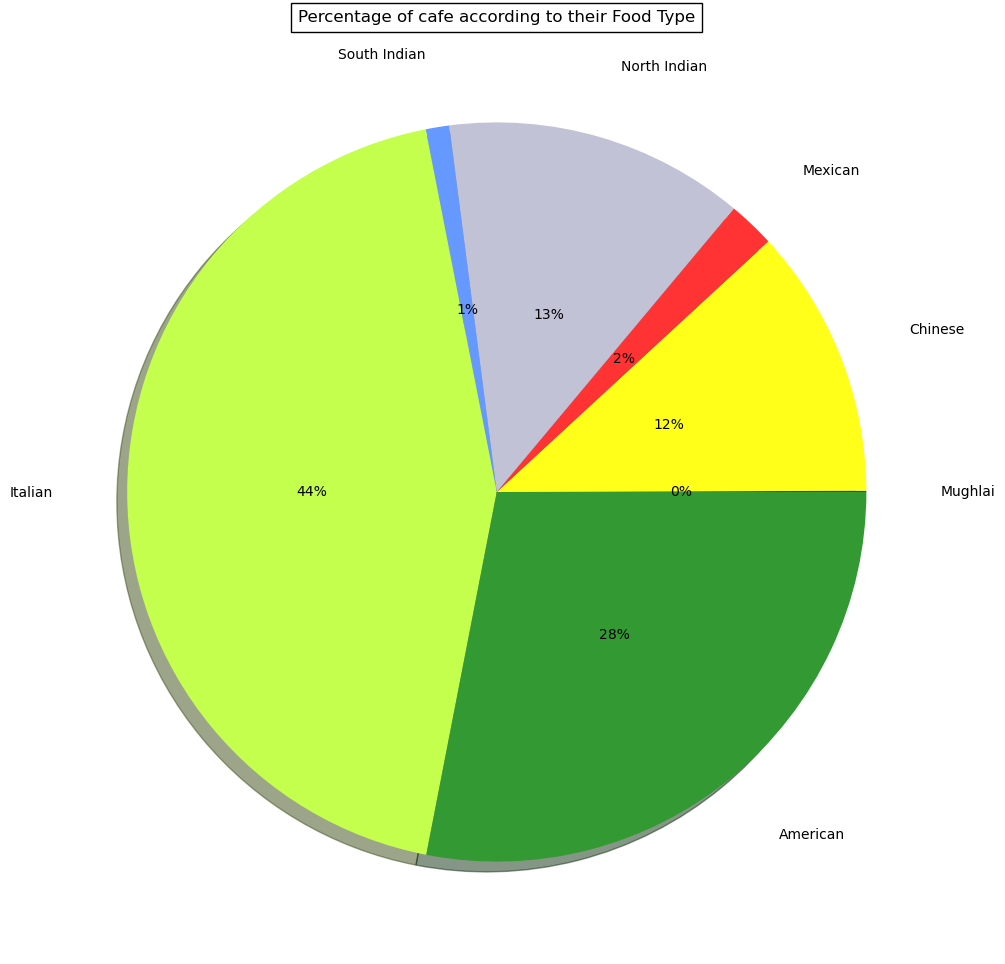

In [57]:
#pie chart showing % of various Food serving Type cafe
slices=[MughlaiFoodcafe.shape[0],
        ChineseFoodcafe.shape[0],
        MexicanFoodcafe.shape[0],
        NorthIndianFoodcafe.shape[0],
        SouthIndianFoodcafe.shape[0],
        ItalianFoodcafe.shape[0],
        AmericanFoodcafe.shape[0]]
labels=['Mughlai','Chinese','Mexican','North Indian','South Indian','Italian','American']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d','#339933']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of cafe according to their Food Type", bbox={'facecolor':'1', 'pad':5})

fig.set_size_inches(12,12)
plt.show()

## Analysis of cafe Whether Single Cuisine or Multi Cusine 

In [58]:
SingleTypeofcoffeeServing = data[data['cuisines'].str.contains(',', case=False, regex=True,na=False)==False]

In [59]:
MultipleTypeofcoffeeServing = data[data['cuisines'].str.contains(',', case=False, regex=True,na=False)]

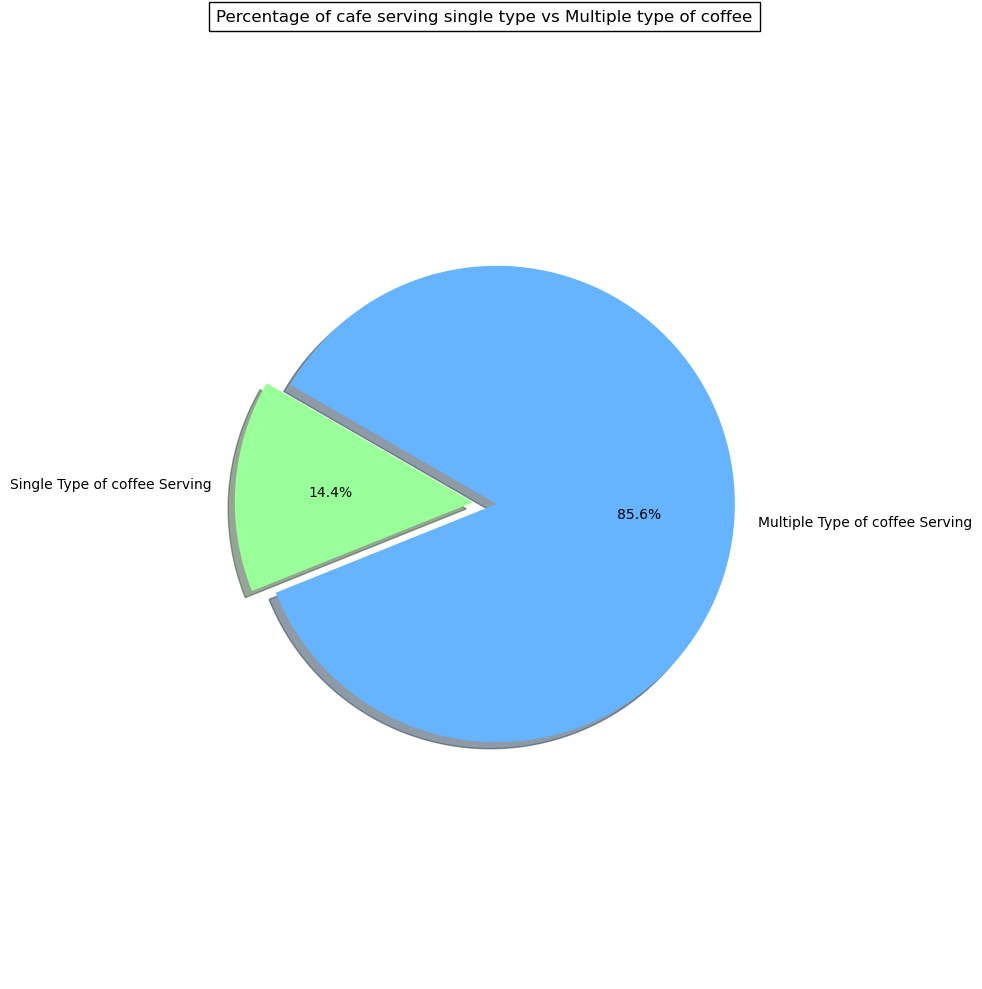

In [60]:
# Pie chart showing Percentage of coffee serving single type vs Multiple type of Foods
labels = ['Single Type of coffee Serving', 'Multiple Type of coffee Serving', ]
sizes = [SingleTypeofcoffeeServing.shape[0], MultipleTypeofcoffeeServing.shape[0]]

explode = (0, 0.1)

colors = ['#99ff99','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=150)

ax1.axis('equal')
plt.title("Percentage of cafe serving single type vs Multiple type of coffee", bbox={'facecolor':'1', 'pad':5})
fig1.set_size_inches(10,10)
plt.tight_layout()
plt.show()

## MOST LIKED DISHES IN BANGALORE

Let's store the dishes liked in seperate list and then analyse it

In [61]:
import re
data=data[data['dish_liked'].notnull()]
data.index=range(data.shape[0])
likes=[]
for i in range(data.shape[0]):
    splited_array=re.split(',',data['dish_liked'][i])
    for item in splited_array:
        likes.append(item)

In [62]:
print("Count of Most liked dishes of Bangalore")
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(20)

Count of Most liked dishes of Bangalore


 Pasta            1246
 Burgers           781
 Sandwiches        673
 Pizza             618
Burgers            527
 Coffee            520
Coffee             444
 Sandwich          429
 Hot Chocolate     406
 Nachos            402
 Fries             367
 Pancakes          294
 Waffles           282
 Mocktails         278
 Brownie           276
 Cappuccino        251
 Tea               249
Pizza              230
Pasta              225
 Salads            217
dtype: int64

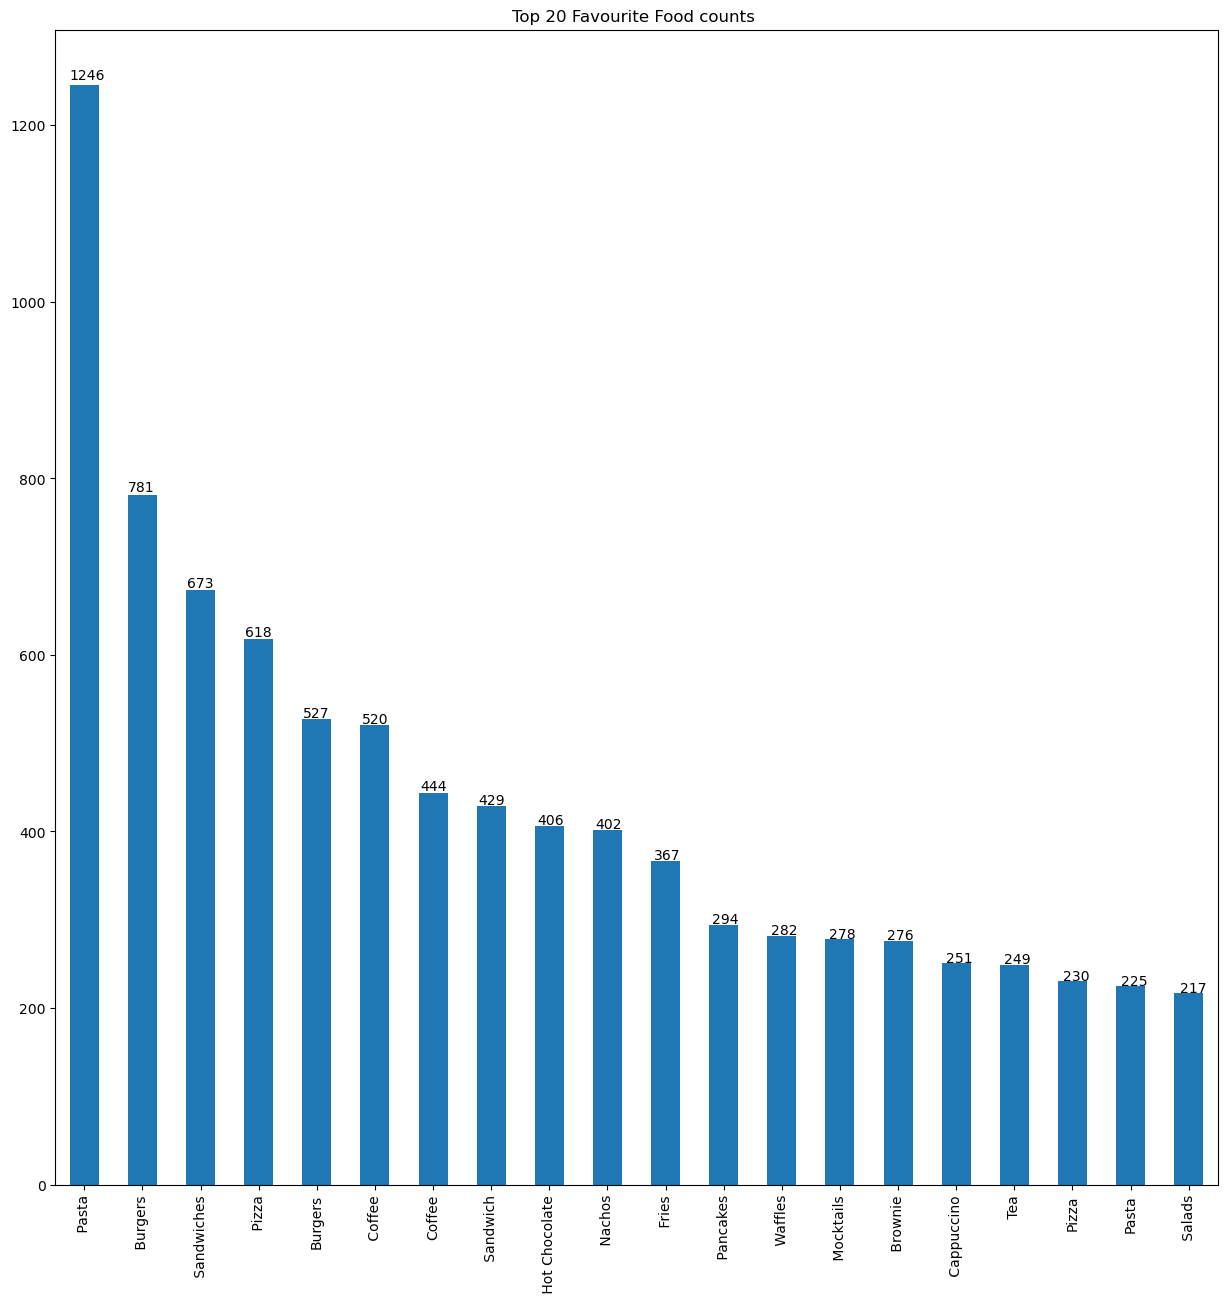

In [63]:
ax = favourite_food.nlargest(n=20, keep='first').plot(kind='bar',figsize=(15,15),title = 'Top 20 Favourite Food counts ')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

## ANALYSIS OF BIGGEST FOOD CHAINS OF BANGALORE¶


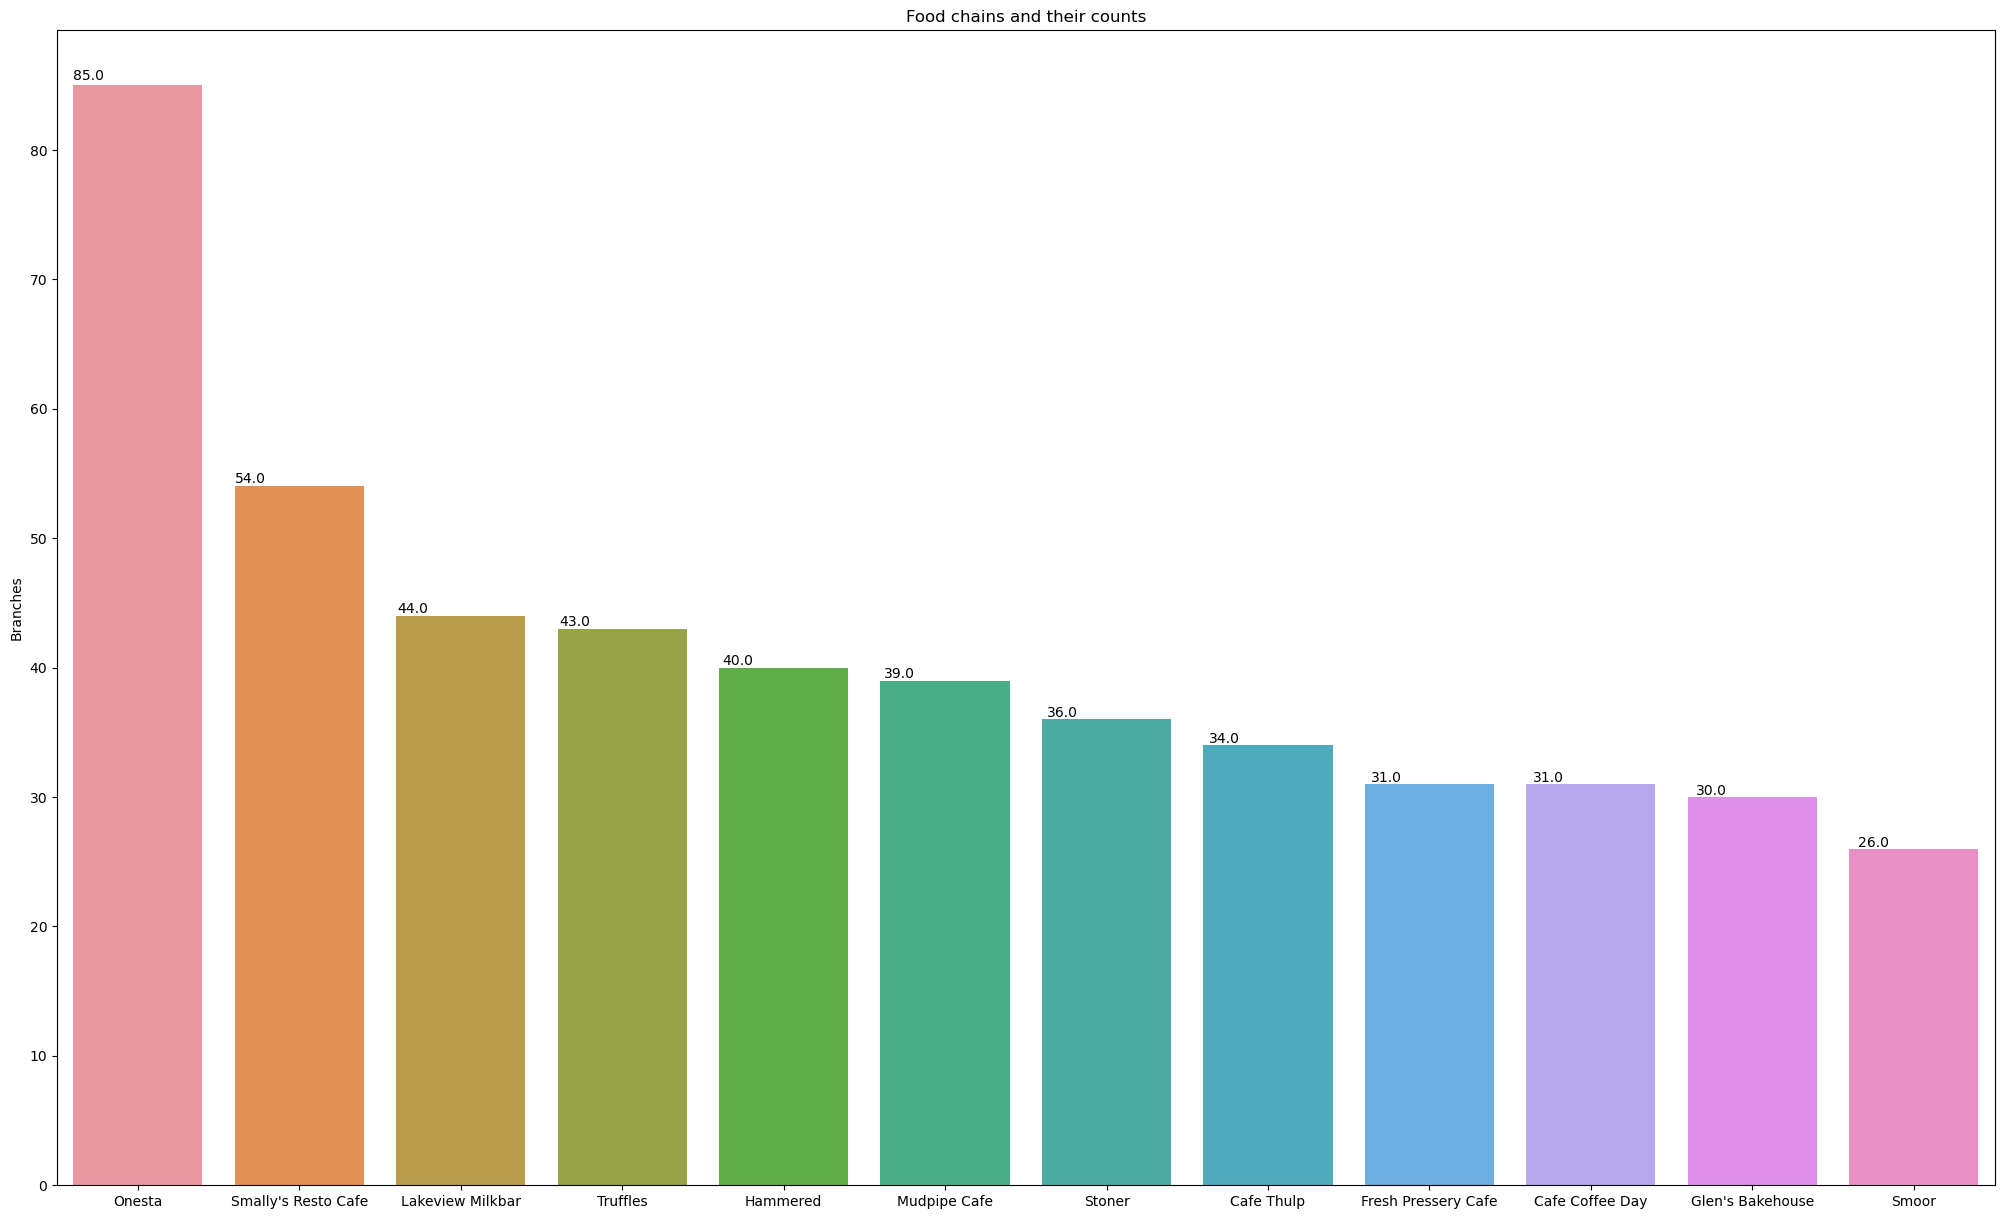

In [64]:
branches = data.groupby(['name']).size().to_frame('count').reset_index().sort_values(['count'],ascending=False)
ax = sns.barplot(x='name', y='count', data=branches[:12])
plt.xlabel('')
plt.ylabel('Branches')
plt.title('Food chains and their counts')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
fig = plt.gcf()
fig.set_size_inches(25,15)

Onesta has highest number of chains in Bangalore



## Using Latitude And Longtude Data
 

In [65]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
import plotly.express as px
import matplotlib.pyplot as plt
import missingno as msno
from datetime import timedelta

In [66]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [67]:
import folium

In [68]:
import requests

In [69]:
from pandas.io.json import json_normalize

In [70]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [71]:
data = pd.read_csv('Bangalore_cafe_long_and_lat.csv')
data

pincode                  officename     Districtname    regionname  \
0     560063   A F Station Yelahanka S.O        Bangalore  Bangalore HQ   
1     560007                   Agram S.O        Bangalore  Bangalore HQ   
2     560007      Air Force Hospital S.O        Bangalore  Bangalore HQ   
3     560092            Amruthahalli B.O        Bangalore  Bangalore HQ   
4     560024  Anandnagar S.O (Bangalore)        Bangalore  Bangalore HQ   
..       ...                         ...              ...           ...   
596   562138         Yeletotadahalli B.O        Ramanagar  Bangalore HQ   
597   562110                 Yeliyur B.O  Bangalore Rural  Bangalore HQ   
598   562127               Yennegere B.O  Bangalore Rural  Bangalore HQ   
599   562123          Yentiganahalli B.O  Bangalore Rural  Bangalore HQ   
600   562159               Yerehalli B.O        Ramanagar  Bangalore HQ   

     Latitude  Longtude  Unnamed: 6  
0     13.1322   77.3967         NaN  
1     13.0643   77.1260         NaN  
2     13.0643   77.1260         NaN  
3     13.0583   77.5732         NaN  
4     12.9714   77.5481         NaN  
..        ...       ...         ...  
596   12.6928   76.6886         NaN  
597   13.2466   77.7118         NaN  
598   13.0516   77.2642         NaN  
599   13.4675   77.1874         NaN  
600   13.6401   77.6156         NaN  

[601 rows x 7 columns]

In [72]:
df=data.head()
df

pincode                  officename Districtname    regionname  Latitude  \
0   560063   A F Station Yelahanka S.O    Bangalore  Bangalore HQ   13.1322   
1   560007                   Agram S.O    Bangalore  Bangalore HQ   13.0643   
2   560007      Air Force Hospital S.O    Bangalore  Bangalore HQ   13.0643   
3   560092            Amruthahalli B.O    Bangalore  Bangalore HQ   13.0583   
4   560024  Anandnagar S.O (Bangalore)    Bangalore  Bangalore HQ   12.9714   

   Longtude  Unnamed: 6  
0   77.3967         NaN  
1   77.1260         NaN  
2   77.1260         NaN  
3   77.5732         NaN  
4   77.5481         NaN

In [73]:
df=data.drop(['Unnamed: 6'], axis = 1)
df

pincode                  officename     Districtname    regionname  \
0     560063   A F Station Yelahanka S.O        Bangalore  Bangalore HQ   
1     560007                   Agram S.O        Bangalore  Bangalore HQ   
2     560007      Air Force Hospital S.O        Bangalore  Bangalore HQ   
3     560092            Amruthahalli B.O        Bangalore  Bangalore HQ   
4     560024  Anandnagar S.O (Bangalore)        Bangalore  Bangalore HQ   
..       ...                         ...              ...           ...   
596   562138         Yeletotadahalli B.O        Ramanagar  Bangalore HQ   
597   562110                 Yeliyur B.O  Bangalore Rural  Bangalore HQ   
598   562127               Yennegere B.O  Bangalore Rural  Bangalore HQ   
599   562123          Yentiganahalli B.O  Bangalore Rural  Bangalore HQ   
600   562159               Yerehalli B.O        Ramanagar  Bangalore HQ   

     Latitude  Longtude  
0     13.1322   77.3967  
1     13.0643   77.1260  
2     13.0643   77.1260  
3     13.0583   77.5732  
4     12.9714   77.5481  
..        ...       ...  
596   12.6928   76.6886  
597   13.2466   77.7118  
598   13.0516   77.2642  
599   13.4675   77.1874  
600   13.6401   77.6156  

[601 rows x 6 columns]

In [74]:
df.columns

Index(['pincode', 'officename', 'Districtname', 'regionname', 'Latitude',
       'Longtude'],
      dtype='object')

In [75]:
df.columns = ['Postcode', 'Neighbourhood', 'Districtname', 'Borough', 'Latitude', 'Longitude']

In [76]:
df.head()


Postcode               Neighbourhood Districtname       Borough  Latitude  \
0    560063   A F Station Yelahanka S.O    Bangalore  Bangalore HQ   13.1322   
1    560007                   Agram S.O    Bangalore  Bangalore HQ   13.0643   
2    560007      Air Force Hospital S.O    Bangalore  Bangalore HQ   13.0643   
3    560092            Amruthahalli B.O    Bangalore  Bangalore HQ   13.0583   
4    560024  Anandnagar S.O (Bangalore)    Bangalore  Bangalore HQ   12.9714   

   Longitude  
0    77.3967  
1    77.1260  
2    77.1260  
3    77.5732  
4    77.5481

In [77]:
df = df[['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude']]

In [78]:
df.columns


Index(['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude'], dtype='object')

In [79]:
df.head()


Postcode       Borough               Neighbourhood  Latitude  Longitude
0    560063  Bangalore HQ   A F Station Yelahanka S.O   13.1322    77.3967
1    560007  Bangalore HQ                   Agram S.O   13.0643    77.1260
2    560007  Bangalore HQ      Air Force Hospital S.O   13.0643    77.1260
3    560092  Bangalore HQ            Amruthahalli B.O   13.0583    77.5732
4    560024  Bangalore HQ  Anandnagar S.O (Bangalore)   12.9714    77.5481

In [80]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Postcode       601 non-null    int64  
 1   Borough        601 non-null    object 
 2   Neighbourhood  601 non-null    object 
 3   Latitude       601 non-null    float64
 4   Longitude      601 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 23.6+ KB


In [81]:
df.isnull().sum()

Postcode         0
Borough          0
Neighbourhood    0
Latitude         0
Longitude        0
dtype: int64


Use geopy library to get the latitude and longitude values of Bangalore City

In [82]:
address = 'Bangalore, Karnataka'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bangalore City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bangalore City are 12.9767936, 77.590082.


In [83]:
# create map of Toronto using latitude and longitude values
map_bng = folium.Map(location=[latitude, longitude], zoom_start=9)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bng)  
    
map_bng

Define Foursquare Credentials and Version

In [84]:
CLIENT_ID = 'JWZWPU4GQ1WBMINFHG4WQIDAFAK0AEUP1KUCZV54AZ5VUQXC' # your Foursquare ID (The Foursquare API is a RESTful API based on HTTP requests and JSON responses.)
CLIENT_SECRET = 'MPPMNJFUII4K5WRAQ40CEAYVUWTRDBIJD3KP2MEMF4LQOO4W' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version (Application Program Interface)

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JWZWPU4GQ1WBMINFHG4WQIDAFAK0AEUP1KUCZV54AZ5VUQXC
CLIENT_SECRET:MPPMNJFUII4K5WRAQ40CEAYVUWTRDBIJD3KP2MEMF4LQOO4W


In [85]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

## Explore Neighbourhoods in Bangalore

In [86]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

code to run the above function on each neighborhood and create a new dataframe called bng_venues.

In [87]:
LIMIT = 10 # limit of number of venues returned by Foursquare API

bng_venues = getNearbyVenues(names=df['Neighbourhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

A F Station Yelahanka S.O
Agram S.O
Air Force Hospital S.O
Amruthahalli B.O
Anandnagar S.O (Bangalore)
Arabic College S.O
Attur B.O
Austin Town S.O
Banaswadi S.O
Bangalore Bazaar S.O
Bangalore International Airport S.O
Bangalore Sub Foreign Post S.O
Bellandur S.O
Benson Town S.O
Bhattarahalli S.O
Bidrahalli B.O
BSF Campus Yelahanka S.O
Byatarayanapura B.O
C.V.Raman Nagar S.O
CMM Court Complex S.O
CMP Centre And School S.O
CRPF Campus Yelahanka S.O
Devanagundi B.O
Devasandra S.O
Doddagubbi B.O
Doddanekkundi B.O
Domlur S.O
Doorvaninagar S.O
Dr. Ambedkar Veedhi S.O
Dr. Shivarama Karanth Nagar S.O
EPIP S.O
Fraser Town S.O
G.K.V.K. S.O
Gunjur B.O
H.A. Farm S.O
H.A.L II Stage H.O
H.K.P. Road S.O
Hebbal Kempapura S.O
HighCourt S.O
Hoodi B.O
Horamavu B.O
Hulsur Bazaar S.O
Indiranagar S.O (Bangalore)
ISRO Anthariksha Bhavan S.O
J.C.Nagar S.O
Jakkur B.O
Jalavayuvihar S.O
Jeevanbhimanagar S.O
Kadugodi Extention SO
Kadugodi S.O
Kalkunte B.O
Kalyananagar S.O
Kannamangala B.O
Kodigehalli B.O
Kothanu

Madavara B.O
Madigondanahalli B.O
Magadi S.O
Mahadevapura B.O
Makali B.O
Makali B.O
Malgal B.O
Mallarabanavadi B.O
Mallathahalli B.O
Mallligemetlu B.O
Malur B.O
Manchanabele B.O
Manchanayakanahalli B.O
Manchegowdanapalya B.O
Mandibele B.O
Mandigere B.O
Mankunda B.O
Manne B.O
Manniganahalli B.O
Maralakunte B.O
Maralavadi S.O
Marale B.O
Marasandra B.O
Marchanhalli B.O
Marikuppe B.O
Marlebekuppe B.O
Marsur B.O
Mathahalli B.O
Mathikere B.O
Mayaganahalli B.O
Mayasandra B.O
Mayasandra B.O
Medamaranahalli B.O
Melekote S.O
Mogenahalli B.O
Motagondanahalli B.O
Mudugere B.O
Mugabala B.O
Mullahalli B.O
Mylanahalli B.O
Mylanayakanhalli B.O
NAGADENAHALLI
Nagavara B.O
Nandagudi S.O
Narasandra B.O
Narasipura B.O
Narayanapura B.O
Narayanapura B.O
Nelamangala S.O
Nelavagilu B.O
Neralur B.O
Neralur B.O
Neriga B.O
Niduvanda B.O
Obalapura B.O
Purushanahalli B.O
Rajaghatta B.O
Ramanagaram S.O
Rameshwara B.O
Rampura B.O
Reddihalli B.O
Sadahalli B.O
Sakkaaregollahalli B.O
Samandur B.O
Sankighatta B.O
Sarjapu

In [88]:
print(bng_venues.shape)

(1373, 7)


## Let's check how many venues were returned for each neighborhood
 

In [89]:
bng_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                   
Abbur B.O                                   5                       5      5   
Adugodi S.O                                 7                       7      7   
Agara B.O                                   4                       4      4   
Alurduddanahalli B.O                        1                       1      1   
Amruthahalli B.O                            4                       4      4   
...                                       ...                     ...    ...   
Yadavanahalli B.O                           2                       2      2   
Yelachenahalli S.O                          8                       8      8   
Yeliyur B.O                                 1                       1      1   
Yeshwanthpur Bazar S.O                      5                       5      5   
Yeswanthpura S.O                            5                       5      5   

                        Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                             
Abbur B.O                            5                5               5  
Adugodi S.O                          7                7               7  
Agara B.O                            4                4               4  
Alurduddanahalli B.O                 1                1               1  
Amruthahalli B.O                     4                4               4  
...                                ...              ...             ...  
Yadavanahalli B.O                    2                2               2  
Yelachenahalli S.O                   8                8               8  
Yeliyur B.O                          1                1               1  
Yeshwanthpur Bazar S.O               5                5               5  
Yeswanthpura S.O                     5                5               5  

[243 rows x 6 columns]

## Let's find out how many unique categories can be curated from all the returned venues 

In [90]:
print('There are {} uniques categories.'.format(len(bng_venues['Venue Category'].unique())))

There are 99 uniques categories.


## Analyze Each Neighbourhood¶
 

In [91]:
# one hot encoding
bng_onehot = pd.get_dummies(bng_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bng_onehot['Neighborhood'] = bng_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bng_onehot.columns[-1]] + list(bng_onehot.columns[:-1])
bng_onehot = bng_onehot[fixed_columns]

bng_onehot.sample(5)

Neighborhood  ATM  American Restaurant  Andhra Restaurant  \
42             Bhattarahalli S.O    0                    0                  0   
1120          Vidyaranyapura S.O    0                    0                  0   
469   Ashoknagar S.O (Bangalore)    0                    0                  0   
1315             Mogenahalli B.O    0                    0                  0   
156                HighCourt S.O    0                    0                  0   

      Arcade  Art Gallery  Asian Restaurant  BBQ Joint  Badminton Court  \
42         0            0                 0          0                0   
1120       0            0                 0          0                0   
469        0            0                 0          0                0   
1315       0            0                 0          0                0   
156        0            0                 0          0                0   

      Bakery  ...  Sports Bar  Steakhouse  Supermarket  Tea Room  Toll Plaza  \
42         0  ...           0           0            0         0           0   
1120       0  ...           0           0            0         0           0   
469        0  ...           0           0            0         0           0   
1315       0  ...           0           0            0         0           0   
156        0  ...           0           1            0         0           0   

      Toy / Game Store  Train Station  Vegetarian / Vegan Restaurant  \
42                   0              0                              0   
1120                 0              0                              0   
469                  0              0                              0   
1315                 0              0                              0   
156                  0              0                              0   

      Vietnamese Restaurant  Zoo Exhibit  
42                        0            0  
1120                      0            0  
469                       0            0  
1315                      0            0  
156                       0            0  

[5 rows x 100 columns]

In [92]:
bng_onehot.shape

(1373, 100)

## Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [93]:
bng_grouped = bng_onehot.groupby('Neighborhood').mean().reset_index()
bng_grouped.sample(5)

Neighborhood  ATM  American Restaurant  Andhra Restaurant  Arcade  \
120     Kathriguppe S.O  0.0                  0.0                0.0     0.0   
154      Mayasandra B.O  0.0                  0.0                0.0     0.0   
82          Hejjala B.O  0.0                  0.0                0.0     0.0   
102  Jalahalli East S.O  0.0                  0.0                0.0     0.0   
228     Vidyanagara B.O  0.0                  0.0                0.0     0.0   

     Art Gallery  Asian Restaurant  BBQ Joint  Badminton Court  Bakery  ...  \
120          0.0               0.0        0.0              0.0     0.0  ...   
154          0.0               0.0        0.0              0.0     0.5  ...   
82           0.0               0.0        0.0              0.0     0.0  ...   
102          0.0               0.0        0.0              0.0     0.0  ...   
228          0.0               0.0        0.0              0.0     0.0  ...   

     Sports Bar  Steakhouse  Supermarket  Tea Room  Toll Plaza  \
120         0.0         0.0          0.0       0.0         0.0   
154         0.0         0.0          0.0       0.0         0.0   
82          0.0         0.0          0.0       0.0         0.0   
102         0.0         0.0          0.0       0.0         0.0   
228         0.0         0.0          0.0       0.0         0.0   

     Toy / Game Store  Train Station  Vegetarian / Vegan Restaurant  \
120               0.0           0.00                       0.000000   
154               0.0           0.00                       0.000000   
82                0.0           0.25                       0.000000   
102               0.0           0.00                       0.333333   
228               0.0           0.00                       0.000000   

     Vietnamese Restaurant  Zoo Exhibit  
120                    0.0          0.0  
154                    0.0          0.0  
82                     0.0          0.0  
102                    0.0          0.0  
228                    0.0          0.0  

[5 rows x 100 columns]

In [94]:
bng_grouped.shape


(243, 100)

## Let's print each neighborhood along with the top 5 most common venues

In [97]:
num_top_venues = 1

for hood in bng_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bng_grouped[bng_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abbur B.O----
               venue  freq
0  Indian Restaurant   0.4


----Adugodi S.O----
        venue  freq
0  Playground  0.29


----Agara B.O----
                venue  freq
0  Italian Restaurant  0.25


----Alurduddanahalli B.O----
        venue  freq
0  Campground   1.0


----Amruthahalli B.O----
      venue  freq
0  Platform  0.25


----Anandnagar S.O (Bangalore)----
               venue  freq
0  Indian Restaurant   0.2


----Anekal S.O----
  venue  freq
0   ATM   1.0


----Anneshwara B.O----
        venue  freq
0  Campground   1.0


----Aradeshanahalli B.O----
        venue  freq
0  Campground   1.0


----Ashoknagar S.O (Bangalore)----
               venue  freq
0  Indian Restaurant  0.33


----Attibele S.O----
               venue  freq
0  Indian Restaurant   0.5


----Bagalur S.O (Bangalore)----
          venue  freq
0  Optical Shop   0.5


----Banashankari III Stage S.O----
            venue  freq
0  Clothing Store   0.2


----Banashankari S.O----
               venue  f

      venue  freq
0  Platform  0.25


----Kodigehalli S.O----
      venue  freq
0  Platform  0.25


----Koramangala I Block S.O----
                venue  freq
0  Italian Restaurant  0.25


----Koramangala S.O----
                venue  freq
0  Italian Restaurant  0.25


----Koramangala VI Bk S.O----
       venue  freq
0  Juice Bar   0.2


----Krishnarajapuram R S S.O----
                           venue  freq
0  Vegetarian / Vegan Restaurant  0.33


----Krishnarajapuram S.O----
               venue  freq
0  Mobile Phone Shop   0.5


----Kugur B.O----
                 venue  freq
0  Fried Chicken Joint  0.11


----Kumaraswamy Layout S.O----
               venue  freq
0  Indian Restaurant  0.12


----Kundalahalli S.O----
               venue  freq
0  Mobile Phone Shop   0.5


----Kundana B.O----
        venue  freq
0  Campground   1.0


----Kyasapura B.O----
               venue  freq
0  Indian Restaurant   0.4


----Laggere S.O----
               venue  freq
0  Indian Restaurant   0.2


        venue  freq
0  Campground   1.0


----Vyalikaval Extn S.O----
               venue  freq
0  Indian Restaurant   0.3


----West of Chord Road II stage S.O----
   venue  freq
0  Hotel  0.33


----Whitefield S.O----
        venue  freq
0  Playground   0.2


----Wilson Garden S.O----
               venue  freq
0  Indian Restaurant   0.2


----Wipro Limited S.O----
               venue  freq
0  Indian Restaurant   0.2


----Yadavanahalli B.O----
               venue  freq
0  Indian Restaurant   0.5


----Yelachenahalli S.O----
               venue  freq
0  Indian Restaurant  0.12


----Yeliyur B.O----
        venue  freq
0  Campground   1.0


----Yeshwanthpur Bazar S.O----
               venue  freq
0  Indian Restaurant   0.2


----Yeswanthpura S.O----
               venue  freq
0  Indian Restaurant   0.2




## Let's put that into a pandas dataframe
 

In [98]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [99]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bng_grouped['Neighborhood']

for ind in np.arange(bng_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bng_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0                 Abbur B.O     Indian Restaurant     Andhra Restaurant   
1               Adugodi S.O            Playground  Fast Food Restaurant   
2                 Agara B.O    Italian Restaurant           Coffee Shop   
3      Alurduddanahalli B.O            Campground                   ATM   
4          Amruthahalli B.O              Platform       Badminton Court   
..                      ...                   ...                   ...   
238       Yadavanahalli B.O     Indian Restaurant                Bakery   
239      Yelachenahalli S.O     Indian Restaurant        Breakfast Spot   
240             Yeliyur B.O            Campground                   ATM   
241  Yeshwanthpur Bazar S.O     Indian Restaurant      Department Store   
242        Yeswanthpura S.O     Indian Restaurant      Department Store   

         3rd Most Common Venue   4th Most Common Venue 5th Most Common Venue  \
0        Hyderabadi Restaurant             Pizza Place     Mobile Phone Shop   
1                 Cocktail Bar           Design Studio           Bus Station   
2                   Restaurant  Furniture / Home Store         Movie Theater   
3            Mobile Phone Shop                Platform           Pizza Place   
4                Event Service           Movie Theater                   ATM   
..                         ...                     ...                   ...   
238  Middle Eastern Restaurant                Platform           Pizza Place   
239             Sandwich Place      Chinese Restaurant                  Café   
240          Mobile Phone Shop                Platform           Pizza Place   
241              Shopping Mall               Multiplex  Fast Food Restaurant   
242              Shopping Mall               Multiplex  Fast Food Restaurant   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                Platform              Pharmacy          Outlet Store   
1       Indian Restaurant                Lounge                Market   
2                Platform           Pizza Place              Pharmacy   
3                Pharmacy          Outlet Store          Optical Shop   
4       Mobile Phone Shop           Pizza Place              Pharmacy   
..                    ...                   ...                   ...   
238              Pharmacy          Outlet Store          Optical Shop   
239          Burger Joint         Movie Theater        Ice Cream Shop   
240              Pharmacy          Outlet Store          Optical Shop   
241         Movie Theater           Pizza Place              Pharmacy   
242         Movie Theater           Pizza Place              Pharmacy   

       9th Most Common Venue   10th Most Common Venue  
0               Optical Shop  North Indian Restaurant  
1                   Platform     Karnataka Restaurant  
2               Outlet Store             Optical Shop  
3    North Indian Restaurant                Multiplex  
4               Outlet Store             Optical Shop  
..                       ...                      ...  
238  North Indian Restaurant                Multiplex  
239                   Lounge                 Platform  
240  North Indian Restaurant                Multiplex  
241             Outlet Store             Optical Shop  
242             Outlet Store             Optical Shop  

[243 rows x 11 columns]

In [100]:
len(bng_grouped[bng_grouped["Coffee Shop"] > 0])

41

## Create a new DataFrame for Coffee Shop data only

In [101]:
bng_coffee = bng_grouped[["Neighborhood","Coffee Shop"]]
bng_coffee

Neighborhood  Coffee Shop
0                 Abbur B.O         0.00
1               Adugodi S.O         0.00
2                 Agara B.O         0.25
3      Alurduddanahalli B.O         0.00
4          Amruthahalli B.O         0.00
..                      ...          ...
238       Yadavanahalli B.O         0.00
239      Yelachenahalli S.O         0.00
240             Yeliyur B.O         0.00
241  Yeshwanthpur Bazar S.O         0.00
242        Yeswanthpura S.O         0.00

[243 rows x 2 columns]

## Cluster Neighbourhoods

finding optimal k  using elbow method

C:\Users\Admin\AppData\Local\Temp\ipykernel_10940\983122341.py:13: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Admin\AppData\Local\Temp\ipykernel_10940\983122341.py:21: ConvergenceWarning:

Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.

C:\Users\Admin\AppData\Local\Temp\ipykernel_10940\98312234

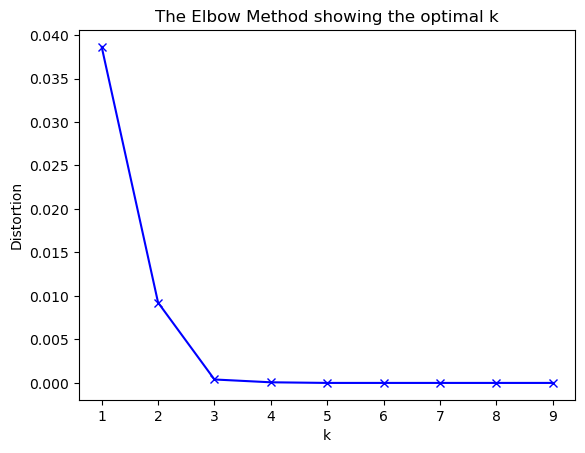

In [102]:
# clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


# create new plot and data
# plt.plot()
X = bng_coffee.drop('Neighborhood', 1)
# colors = ['b', 'g', 'r']
# markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [103]:
# set number of clusters
kclusters = 4

bng_clustering =bng_coffee.drop(["Neighborhood"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bng_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

C:\Users\Admin\AppData\Local\Temp\ipykernel_10940\4110218309.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [104]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
bng_merged = bng_coffee.copy()

# add clustering labels
bng_merged["Cluster Labels"] = kmeans.labels_
bng_merged

Neighborhood  Coffee Shop  Cluster Labels
0                 Abbur B.O         0.00               0
1               Adugodi S.O         0.00               0
2                 Agara B.O         0.25               1
3      Alurduddanahalli B.O         0.00               0
4          Amruthahalli B.O         0.00               0
..                      ...          ...             ...
238       Yadavanahalli B.O         0.00               0
239      Yelachenahalli S.O         0.00               0
240             Yeliyur B.O         0.00               0
241  Yeshwanthpur Bazar S.O         0.00               0
242        Yeswanthpura S.O         0.00               0

[243 rows x 3 columns]

In [105]:
bng_merged = bng_merged.join(df.set_index("Neighbourhood"), on="Neighborhood")

print(bng_merged.shape)
bng_merged # check the last columns!

(253, 7)


Neighborhood  Coffee Shop  Cluster Labels  Postcode  \
0                 Abbur B.O         0.00               0    562108   
1               Adugodi S.O         0.00               0    560030   
2                 Agara B.O         0.25               1    560034   
3      Alurduddanahalli B.O         0.00               0    562110   
4          Amruthahalli B.O         0.00               0    560092   
..                      ...          ...             ...       ...   
238       Yadavanahalli B.O         0.00               0    562107   
239      Yelachenahalli S.O         0.00               0    560078   
240             Yeliyur B.O         0.00               0    562110   
241  Yeshwanthpur Bazar S.O         0.00               0    560022   
242        Yeswanthpura S.O         0.00               0    560022   

          Borough  Latitude  Longitude  
0    Bangalore HQ   13.0366    77.6218  
1    Bangalore HQ   12.9440    77.6079  
2    Bangalore HQ   13.0381    77.6549  
3    Bangalore HQ   13.2466    77.7118  
4    Bangalore HQ   13.0583    77.5732  
..            ...       ...        ...  
238  Bangalore HQ   12.7781    77.7726  
239  Bangalore HQ   12.9057    77.5617  
240  Bangalore HQ   13.2466    77.7118  
241  Bangalore HQ   12.9714    77.5481  
242  Bangalore HQ   12.9714    77.5481  

[253 rows x 7 columns]

In [106]:
# sort the results by Cluster Labels
print(bng_merged.shape)
bng_merged.sort_values(["Cluster Labels"], inplace=True)
bng_merged

(253, 7)


Neighborhood  Coffee Shop  Cluster Labels  Postcode  \
0                  Abbur B.O     0.000000               0    562108   
143        Mallathahalli B.O     0.000000               0    561203   
144          Malleswaram S.O     0.000000               0    560003   
145     Malleswaram West S.O     0.000000               0    560055   
146  Manchanayakanahalli B.O     0.000000               0    562109   
..                       ...          ...             ...       ...   
64           Dommasandra B.O     0.111111               3    562125   
170               Neriga B.O     0.111111               3    562125   
79          Handenahalli B.O     0.111111               3    562125   
128                Kugur B.O     0.111111               3    562125   
196            Sarjapura S.O     0.111111               3    562125   

          Borough  Latitude  Longitude  
0    Bangalore HQ   13.0366    77.6218  
143  Bangalore HQ   13.4412    77.4596  
144  Bangalore HQ   13.0097    77.5648  
145  Bangalore HQ   12.9979    77.5861  
146  Bangalore HQ   12.7989    77.3864  
..            ...       ...        ...  
64   Bangalore HQ   12.9247    77.6496  
170  Bangalore HQ   12.9247    77.6496  
79   Bangalore HQ   12.9247    77.6496  
128  Bangalore HQ   12.9247    77.6496  
196  Bangalore HQ   12.9247    77.6496  

[253 rows x 7 columns]

# Finally, let's visualize the resulting clusters¶

In [107]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bng_merged['Latitude'], bng_merged['Longitude'], bng_merged['Neighborhood'], bng_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
# save the map as HTML file
map_clusters.save('map_clusters.html')

## Examine Clusters

CLUSTER - 1

In [108]:
bng_merged.loc[bng_merged['Cluster Labels'] == 0]

Neighborhood  Coffee Shop  Cluster Labels  Postcode  \
0                   Abbur B.O          0.0               0    562108   
143         Mallathahalli B.O          0.0               0    561203   
144           Malleswaram S.O          0.0               0    560003   
145      Malleswaram West S.O          0.0               0    560055   
146   Manchanayakanahalli B.O          0.0               0    562109   
..                        ...          ...             ...       ...   
86                  Hoodi B.O          0.0               0    560048   
87               Horamavu B.O          0.0               0    560043   
70   Gaviopuram Extension S.O          0.0               0    560019   
81           Hegganahalli B.O          0.0               0    562110   
73              Gottigere S.O          0.0               0    560083   

          Borough  Latitude  Longitude  
0    Bangalore HQ   13.0366    77.6218  
143  Bangalore HQ   13.4412    77.4596  
144  Bangalore HQ   13.0097    77.5648  
145  Bangalore HQ   12.9979    77.5861  
146  Bangalore HQ   12.7989    77.3864  
..            ...       ...        ...  
86   Bangalore HQ   12.9944    77.7164  
87   Bangalore HQ   13.0158    77.6487  
70   Bangalore HQ   12.9967    77.5551  
81   Bangalore HQ   13.2466    77.7118  
73   Bangalore HQ   12.9023    77.6011  

[210 rows x 7 columns]

CLUSTER - 2

In [109]:
bng_merged.loc[bng_merged['Cluster Labels'] == 1]

Neighborhood  Coffee Shop  Cluster Labels  Postcode  \
207  St. John's Medical College S.O         0.25               1    560034   
28                  Bettahalsur S.O         0.25               1    562157   
228                 Vidyanagara B.O         0.25               1    562157   
2                         Agara B.O         0.25               1    560034   
213                  Tarahunise B.O         0.25               1    562157   
60                    Doddajala B.O         0.25               1    562157   
123         Koramangala I Block S.O         0.25               1    560034   
124                 Koramangala S.O         0.25               1    560034   
53                   Chikkajala B.O         0.25               1    562157   
91            Hunasamaranahalli B.O         0.25               1    562157   

          Borough  Latitude  Longitude  
207  Bangalore HQ   13.0381    77.6549  
28   Bangalore HQ   13.1438    77.6169  
228  Bangalore HQ   13.1438    77.6169  
2    Bangalore HQ   13.0381    77.6549  
213  Bangalore HQ   13.1438    77.6169  
60   Bangalore HQ   13.1438    77.6169  
123  Bangalore HQ   13.0381    77.6549  
124  Bangalore HQ   13.0381    77.6549  
53   Bangalore HQ   13.1438    77.6169  
91   Bangalore HQ   13.1438    77.6169

Cluster 3

In [110]:
bng_merged.loc[bng_merged['Cluster Labels'] == 2]

Neighborhood  Coffee Shop  Cluster Labels  Postcode  \
219       Thyagarajnagar S.O     0.100000               2    560004   
231           Virgonagar S.O     0.100000               2    560049   
21     Bannerghatta Road S.O     0.100000               2    560076   
236        Wilson Garden S.O     0.100000               2    560027   
111             Kadugodi S.O     0.100000               2    560067   
32         Bhattarahalli S.O     0.100000               2    560049   
114             Kalkunte B.O     0.100000               2    560067   
117         Kannamangala B.O     0.090909               2    560067   
117         Kannamangala B.O     0.090909               2    561203   
117         Kannamangala B.O     0.090909               2    562110   
101  JP Nagar VIII phase S.O     0.100000               2    560076   
90              Hulimavu S.O     0.100000               2    560076   
89              Hulimavu B.O     0.100000               2    560076   
153              Mavalli S.O     0.100000               2    560004   
155      Medimallasandra B.O     0.100000               2    560067   
156          Mico Layout S.O     0.100000               2    560076   
23          Basavanagudi H.O     0.100000               2    560004   
158      Mount St Joseph B.O     0.100000               2    560076   
164            Naduvathi B.O     0.100000               2    560067   
110    Kadugodi Extention SO     0.100000               2    560067   
173   Pampamahakavi Road S.O     0.100000               2    560004   
190       Sadashivanagar S.O     0.100000               2    560080   
194       Samethanahalli B.O     0.100000               2    560067   
195     Sampangiramnagar S.O     0.100000               2    560027   
35            Bidrahalli B.O     0.100000               2    560049   
199         Shanthinagar S.O     0.100000               2    560027   
160               Mundur B.O     0.100000               2    560049   
56           Devanagundi B.O     0.100000               2    560067   

          Borough  Latitude  Longitude  
219  Bangalore HQ   12.9833    77.5833  
231  Bangalore HQ   12.9833    77.5833  
21   Bangalore HQ   12.9833    77.5833  
236  Bangalore HQ   12.9506    77.5952  
111  Bangalore HQ   12.9833    77.5833  
32   Bangalore HQ   12.9833    77.5833  
114  Bangalore HQ   12.9833    77.5833  
117  Bangalore HQ   12.9833    77.5833  
117  Bangalore HQ   13.4412    77.4596  
117  Bangalore HQ   13.2466    77.7118  
101  Bangalore HQ   12.9833    77.5833  
90   Bangalore HQ   12.9833    77.5833  
89   Bangalore HQ   12.9833    77.5833  
153  Bangalore HQ   12.9833    77.5833  
155  Bangalore HQ   12.9833    77.5833  
156  Bangalore HQ   12.9833    77.5833  
23   Bangalore HQ   12.9833    77.5833  
158  Bangalore HQ   12.9833    77.5833  
164  Bangalore HQ   12.9833    77.5833  
110  Bangalore HQ   12.9833    77.5833  
173  Bangalore HQ   12.9833    77.5833  
190  Bangalore HQ   13.0104    77.5806  
194  Bangalore HQ   12.9833    77.5833  
195  Bangalore HQ   12.9506    77.5952  
35   Bangalore HQ   12.9833    77.5833  
199  Bangalore HQ   12.9506    77.5952  
160  Bangalore HQ   12.9833    77.5833  
56   Bangalore HQ   12.9833    77.5833

CLSUTER -4

In [111]:
bng_merged.loc[bng_merged['Cluster Labels'] == 3]

Neighborhood  Coffee Shop  Cluster Labels  Postcode       Borough  \
64    Dommasandra B.O     0.111111               3    562125  Bangalore HQ   
170        Neriga B.O     0.111111               3    562125  Bangalore HQ   
79   Handenahalli B.O     0.111111               3    562125  Bangalore HQ   
128         Kugur B.O     0.111111               3    562125  Bangalore HQ   
196     Sarjapura S.O     0.111111               3    562125  Bangalore HQ   

     Latitude  Longitude  
64    12.9247    77.6496  
170   12.9247    77.6496  
79    12.9247    77.6496  
128   12.9247    77.6496  
196   12.9247    77.6496

In [112]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Generate some sample data
X, y = make_blobs(n_samples=1000, centers=4, n_features=10, random_state=42)

# Instantiate a KMeans clustering model
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kmeans.labels_)

print(f"The average silhouette score is: {silhouette_avg}")

The average silhouette score is: 0.7638554259416165
